Importing Important libraries

In [1]:
import sys
sys.path.insert(0, '/content/utilities.py')
import utilities as u

from IPython.display import display
import pandas as pd
import numpy as np
import json
import time

from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Read in the json files
portfolio = pd.read_json('/content/portfolio.json', orient='records', lines=True)
profile = pd.read_json('/content/profile.json', orient='records', lines=True)
transcript = pd.read_json('/content/transcript.json', orient='records', lines=True)

In [3]:
portfolio.head()

reward                      channels  difficulty  duration     offer_type                                id
0      10       [email, mobile, social]          10         7           bogo  ae264e3637204a6fb9bb56bc8210ddfd
1      10  [web, email, mobile, social]          10         5           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0
2       0          [web, email, mobile]           0         4  informational  3f207df678b143eea3cee63160fa8bed
3       5          [web, email, mobile]           5         7           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9
4       5                  [web, email]          20        10       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [4]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


Check the null values for the portfolio dataset

In [5]:
u.compute_null_pct(portfolio)

    column  count  pct
    reward      0  0.0
  channels      0  0.0
difficulty      0  0.0
  duration      0  0.0
offer_type      0  0.0
        id      0  0.0


Getting basic info for the profile dataset

In [6]:
profile.head()

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

In [7]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [8]:
# Check null values
u.compute_null_pct(profile)

          column  count   pct
          gender   2175 12.79
             age      0  0.00
              id      0  0.00
became_member_on      0  0.00
          income   2175 12.79


In [9]:
# Check the null values for the gender
profile[profile.gender.isnull() == True].head(10)

gender  age                                id  became_member_on  income
0    None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212     NaN
2    None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712     NaN
4    None  118  a03223e636434f42ac4c3df47e8bac43          20170804     NaN
6    None  118  8ec6ce2a7e7949b1bf142def7d0e0586          20170925     NaN
7    None  118  68617ca6246f4fbc85e91a2a49552598          20171002     NaN
9    None  118  8974fc5686fe429db53ddde067b88302          20161122     NaN
10   None  118  c4863c7985cf408faee930f111475da3          20170824     NaN
11   None  118  148adfcaa27d485b82f323aaaad036bd          20150919     NaN
17   None  118  744d603ef08c4f33af5a61c8c7628d1c          20170801     NaN
23   None  118  2b826eba31074a059d63b0ae8f50b7d5          20170907     NaN

In [10]:
# value_counts of `income` where `gender` is null
profile[profile.gender.isnull() == True].income.value_counts(dropna=False)

income
NaN    2175
Name: count, dtype: int64

In [11]:
# value_counts of `age` where `gender` is null
profile[profile.gender.isnull() == True].age.value_counts()

age
118    2175
Name: count, dtype: int64

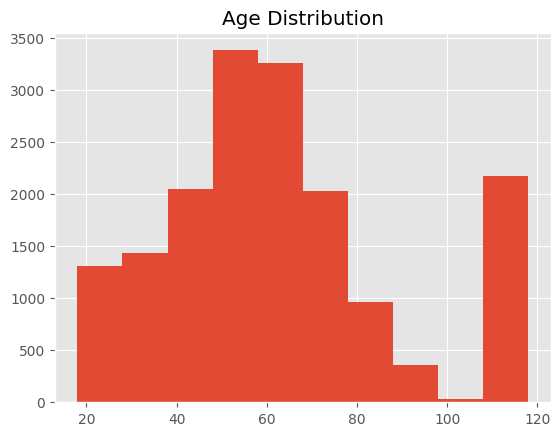

In [12]:
# Check `age` distribution
plt.hist(profile.age);
plt.title('Age Distribution');

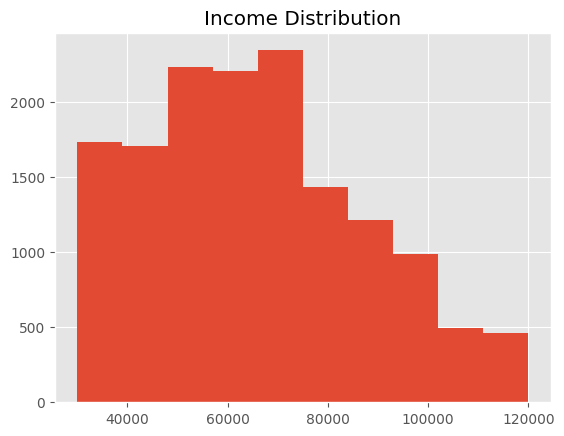

In [13]:
# Check `income` distribution
plt.hist(profile.income.dropna());
plt.title('Income Distribution');

In [14]:
profile.gender.value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

Getting basic info of the transcript dataset

In [15]:
#for getting the last 5 rows of the dataset
transcript.tail()

person        event                           value  time
306529  b3a1272bc9904337b331bf348c3e8c17  transaction  {'amount': 1.5899999999999999}   714
306530  68213b08d99a4ae1b0dcb72aebd9aa35  transaction                {'amount': 9.53}   714
306531  a00058cf10334a308c68e7631c529907  transaction                {'amount': 3.61}   714
306532  76ddbd6576844afe811f1a3c0fbb5bec  transaction  {'amount': 3.5300000000000002}   714
306533  c02b10e8752c4d8e9b73f918558531f7  transaction                {'amount': 4.05}   714

In [16]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [17]:
transcript.event.value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [18]:
transcript.loc[transcript.event == 'transaction'].value.head()

12654    {'amount': 0.8300000000000001}
12657                 {'amount': 34.56}
12659                 {'amount': 13.23}
12670                 {'amount': 19.51}
12671                 {'amount': 18.97}
Name: value, dtype: object

In [19]:
transcript[transcript.event == 'offer received'].value.head()

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3    {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
Name: value, dtype: object

In [20]:
transcript.loc[transcript.event == 'offer viewed'].value.head()

12650    {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
12651    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
12652    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
12653    {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
12655    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
Name: value, dtype: object

In [21]:
transcript.loc[transcript.event == 'offer completed'].value.head()

12658    {'offer_id': '2906b810c7d4411798c6938adc9daaa5...
12672    {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...
12679    {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
12692    {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...
12697    {'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
Name: value, dtype: object

In [22]:
transcript.loc[transcript.person == '78afa995795e4d85b5d9ceeca43f5fef']

person            event                                              value  time
0       78afa995795e4d85b5d9ceeca43f5fef   offer received   {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0
15561   78afa995795e4d85b5d9ceeca43f5fef     offer viewed   {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     6
47582   78afa995795e4d85b5d9ceeca43f5fef      transaction                                  {'amount': 19.89}   132
47583   78afa995795e4d85b5d9ceeca43f5fef  offer completed  {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...   132
49502   78afa995795e4d85b5d9ceeca43f5fef      transaction                                  {'amount': 17.78}   144
53176   78afa995795e4d85b5d9ceeca43f5fef   offer received   {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}   168
85291   78afa995795e4d85b5d9ceeca43f5fef     offer viewed   {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}   216
87134   78afa995795e4d85b5d9ceeca43f5fef      transaction                                  {'amount': 19.67}   222
92104   78afa995795e4d85b5d9ceeca43f5fef      transaction                                  {'amount': 29.72}   240
141566  78afa995795e4d85b5d9ceeca43f5fef      transaction                                  {'amount': 23.93}   378
150598  78afa995795e4d85b5d9ceeca43f5fef   offer received   {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}   408
163375  78afa995795e4d85b5d9ceeca43f5fef     offer viewed   {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}   408
201572  78afa995795e4d85b5d9ceeca43f5fef   offer received   {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}   504
218393  78afa995795e4d85b5d9ceeca43f5fef      transaction                                  {'amount': 21.72}   510
218394  78afa995795e4d85b5d9ceeca43f5fef  offer completed  {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...   510
218395  78afa995795e4d85b5d9ceeca43f5fef  offer completed  {'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...   510
230412  78afa995795e4d85b5d9ceeca43f5fef      transaction                                  {'amount': 26.56}   534
262138  78afa995795e4d85b5d9ceeca43f5fef     offer viewed   {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}   582

In [23]:
# Check test period
print(transcript.time.max(), 'hours')
print(transcript.time.max() / 24, 'days')

714 hours
29.75 days


##Rename specified columns

In [24]:
portfolio.rename(columns={
    'id': 'offer_id',
    'reward': 'offered_reward'}, inplace=True)

Using one hot encoding

In [25]:
# One-hot encode `channel` column
portfolio = u.one_hot_encoder(
    df = portfolio,
    target_column = 'channels',
    categories = ['web','email','mobile','social'],
    prefix = 'channel')

# One-hot encode `offer_type` column
portfolio = u.one_hot_encoder(
    df = portfolio,
    target_column = 'offer_type',
    categories = ['discount','bogo','informational'],
    prefix = 'type')

Label encoder

In [26]:
# Convert `offer_id` to integers
portfolio, offer_id_dict = u.label_encoder(
    df = portfolio,
    target_column = 'offer_id',
    start = 1,
    step = 1)

In [27]:
offer_id_dict

{'ae264e3637204a6fb9bb56bc8210ddfd': 1,
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 2,
 '3f207df678b143eea3cee63160fa8bed': 3,
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 4,
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 5,
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 6,
 'fafdcd668e3743c1bb461111dcafc2a4': 7,
 '5a8bc65990b245e5a138643cd4eb9837': 8,
 'f19421c1d4aa40978ebb69ca19b0e20d': 9,
 '2906b810c7d4411798c6938adc9daaa5': 10}

In [28]:
portfolio.head()

offered_reward  difficulty  duration  offer_id  channel_web  channel_email  channel_mobile  channel_social  type_discount  type_bogo  type_informational
0              10          10         7         1            0              1               1               1              0          1                   0
1              10          10         5         2            1              1               1               1              0          1                   0
2               0           0         4         3            1              1               1               0              0          0                   1
3               5           5         7         4            1              1               1               0              0          1                   0
4               5          20        10         5            1              1               0               0              1          0                   0

In [29]:
u.compute_null_pct(portfolio)

            column  count  pct
    offered_reward      0  0.0
        difficulty      0  0.0
          duration      0  0.0
          offer_id      0  0.0
       channel_web      0  0.0
     channel_email      0  0.0
    channel_mobile      0  0.0
    channel_social      0  0.0
     type_discount      0  0.0
         type_bogo      0  0.0
type_informational      0  0.0


Renaming columns for the profile dataset

In [30]:
profile.rename(columns={'id': 'customer_id'}, inplace=True)

In [31]:
# Convert `became_member_on` to standard `datetime` object
profile.became_member_on = pd.to_datetime(profile.became_member_on, format='%Y%m%d')

# Add calculated 'days_member' column
profile['days_member'] = (pd.to_datetime('today') - profile['became_member_on']).dt.days

# Drop `became_member_on`
profile.drop(columns='became_member_on', inplace=True)

In [32]:
# Retain `customer_id` of rows to be deleted to later remove corresponding rows in `transcript`
dropped_profiles = profile[
    (profile.gender.isnull() == True) | (profile.gender == 'O')]['customer_id'].values

# Drop rows using the list produced in `dropped_profiles` above
profile.drop(profile[profile.customer_id.isin(dropped_profiles) == True].index, inplace=True)

# Reset index
profile.reset_index(drop=True, inplace=True)

In [33]:
# Remap `gender` column using binary values
profile.gender = profile.gender.map({'F':0, 'M':1})

Converting Customer_id to simple integers

In [34]:
profile,customer_id_dict = u.label_encoder(
    df = profile,
    target_column = 'customer_id',
    start = 1,
    step = 1)

In [35]:
# Preview 5 element
dict(list(customer_id_dict.items())[0:5])

{'0610b486422d4921ae7d2bf64640c50b': 1,
 '78afa995795e4d85b5d9ceeca43f5fef': 2,
 'e2127556f4f64592b11af22de27a7932': 3,
 '389bc3fa690240e798340f5a15918d5c': 4,
 '2eeac8d8feae4a8cad5a6af0499a211d': 5}

In [36]:
profile.head(10)

gender  age  customer_id    income  days_member
0       0   55            1  112000.0         2607
1       0   75            2  100000.0         2674
2       1   68            3   70000.0         2322
3       1   65            4   53000.0         2398
4       1   58            5   51000.0         2488
5       0   61            6   57000.0         2549
6       1   26            7   46000.0         3855
7       0   62            8   71000.0         3127
8       1   49            9   52000.0         3582
9       1   57           10   42000.0         2438

In [37]:
profile.tail()

gender  age  customer_id   income  days_member
14608       0   45        14609  54000.0         2283
14609       1   61        14610  72000.0         2244
14610       1   49        14611  73000.0         2777
14611       0   83        14612  50000.0         3102
14612       0   62        14613  82000.0         2600

In [38]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14613 entries, 0 to 14612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       14613 non-null  int64  
 1   age          14613 non-null  int64  
 2   customer_id  14613 non-null  int64  
 3   income       14613 non-null  float64
 4   days_member  14613 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 570.9 KB


Computing the null values

In [39]:
u.compute_null_pct(profile)

     column  count  pct
     gender      0  0.0
        age      0  0.0
customer_id      0  0.0
     income      0  0.0
days_member      0  0.0


In [40]:
# Rename `person` column to `customer_id`
transcript.rename(columns={'person': 'customer_id'}, inplace=True)

In [41]:
# Drop rows with `customer_id` corresponding to deleted users in `profile`
transcript = transcript[transcript.customer_id.isin(dropped_profiles) == False]

Map customer_id with previously created customer_id_dict

In [42]:
transcript.customer_id = transcript.customer_id.apply(lambda x: customer_id_dict[x])

In [43]:
# Add column `value_type`
transcript['value_type'] = transcript.value.apply(lambda x : list(x.keys())[0])

# Add column `actual_value`
transcript['actual_value'] = transcript.value.apply(lambda x : list(x.values())[0])

# Drop `value` column
transcript.drop(columns='value', inplace=True)

In [44]:
transcript.head()

customer_id           event  time value_type                      actual_value
0            2  offer received     0   offer id  9b98b8c7a33c4b65b9aebfe6a799e6d9
2            3  offer received     0   offer id  2906b810c7d4411798c6938adc9daaa5
5            4  offer received     0   offer id  f19421c1d4aa40978ebb69ca19b0e20d
7            5  offer received     0   offer id  3f207df678b143eea3cee63160fa8bed
8            6  offer received     0   offer id  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [45]:
transcript.tail(10)

customer_id            event  time value_type                      actual_value
306522        14542      transaction   714     amount                              4.42
306523        14545      transaction   714     amount                             18.35
306524        14558      transaction   714     amount                             25.14
306525        14559      transaction   714     amount                             43.58
306526        14572      transaction   714     amount                             22.64
306527        14572  offer completed   714   offer_id  fafdcd668e3743c1bb461111dcafc2a4
306529        14580      transaction   714     amount                              1.59
306530        14585      transaction   714     amount                              9.53
306531        14598      transaction   714     amount                              3.61
306532        14604      transaction   714     amount                              3.53

split the transcript datet into transaction and offers to work seperately

In [54]:
offers_df = transcript[transcript['event'] != 'transaction']
transactions_df = transcript[transcript['event'] == 'transaction']

In [55]:
# Rename columns
offers_df.rename(columns={'actual_value': 'offer_id'}, inplace=True)
transactions_df.rename(columns={'actual_value': 'amount'}, inplace=True)

In [56]:
# Drop unnecessary columns
offers_df.drop(columns='value_type', inplace=True)
transactions_df.drop(columns=['value_type', 'event'], inplace=True)

Map `offer_id` with previously created `offer_id_dict`

In [57]:
offers_df.offer_id = offers_df.offer_id.apply(lambda x: offer_id_dict[x])

In [58]:
offers_df.head(10)

customer_id           event  time  offer_id
0             2  offer received     0         4
2             3  offer received     0        10
5             4  offer received     0         9
7             5  offer received     0         3
8             6  offer received     0         5
9             8  offer received     0         5
12           13  offer received     0         1
13           14  offer received     0         3
14        11560  offer received     0         5
15           15  offer received     0         7

In [59]:
u.compute_null_pct(offers_df)

     column  count  pct
customer_id      0  0.0
      event      0  0.0
       time      0  0.0
   offer_id      0  0.0


In [60]:
transactions_df.head()

customer_id  time amount
12654           28     0   0.83
12657           39     0  34.56
12659           45     0  13.23
12670          107     0  19.51
12671          123     0  18.97

In [61]:
u.compute_null_pct(transactions_df)

     column  count  pct
customer_id      0  0.0
       time      0  0.0
     amount      0  0.0


Merge protfolio to offers_id

In [62]:
offers_df = pd.merge(offers_df, portfolio, on='offer_id')

In [63]:
offers_df.head()

customer_id           event  time  offer_id  offered_reward  difficulty  duration  channel_web  channel_email  channel_mobile  channel_social  type_discount  type_bogo  type_informational
0            2  offer received     0         4               5           5         7            1              1               1               0              0          1                   0
1           19  offer received     0         4               5           5         7            1              1               1               0              0          1                   0
2           23  offer received     0         4               5           5         7            1              1               1               0              0          1                   0
3           29  offer received     0         4               5           5         7            1              1               1               0              0          1                   0
4           32  offer received     0         4               5           5         7            1              1               1               0              0          1                   0

Split offers_df based on the event

In [64]:
received_df = offers_df[offers_df['event']=='offer received']
viewed_df = offers_df[offers_df['event']=='offer viewed']
completed_df = offers_df[offers_df['event']=='offer completed']

In [65]:
aux_df = received_df.copy()

In [66]:
# Rename `event` to `offer_received` in `aux_df`
aux_df.rename(columns={'event': 'offer_received'}, inplace=True)
aux_df.offer_received = 1

Rename `time` to `offer_start_time` and add `offer_end_time`

In [67]:
aux_df.rename(columns={'time': 'offer_start_time'}, inplace=True)
aux_df['offer_end_time'] = aux_df.offer_start_time + aux_df.duration * 24

In [68]:
# Add empty object column to store `output_value` list of function
aux_df['output_value'] = ''

# Apply u.get_offer_engagements to each row
aux_df.output_value = aux_df.apply(
    lambda x: u.get_offer_engagements(x, viewed_df, completed_df, transactions_df), axis=1)

# Expand `output_value` list to columns
aux_df = u.expand_list_to_columns(aux_df, 'output_value', {
    0: 'offer_viewed_time',
    1: 'offer_completed_time'})

In [69]:
aux_df[['offer_start_time', 'offer_end_time', 'offer_viewed_time', 'offer_completed_time']].head(15)

offer_start_time  offer_end_time  offer_viewed_time  offer_completed_time
0                  0             168                6.0                 132.0
1                  0             168                NaN                   NaN
2                  0             168               48.0                   NaN
3                  0             168               30.0                  66.0
4                  0             168                NaN                   NaN
5                  0             168               18.0                   NaN
6                  0             168               96.0                 156.0
7                  0             168                NaN                   NaN
8                  0             168                NaN                   NaN
9                  0             168                NaN                   NaN
10                 0             168               24.0                   NaN
11                 0             168                0.0                  36.0
12                 0             168                0.0                   0.0
13                 0             168               12.0                  24.0
14                 0             168                6.0                  42.0

In [70]:
# Add `response_score` column

aux_df['response_score'] = (
    aux_df.offer_completed_time -
    aux_df.offer_viewed_time).apply(
    lambda x: x if x >= 0 else np.NaN)

aux_df.response_score = np.round(((
    (aux_df.duration * 24) - aux_df.response_score) /
    (aux_df.duration * 24)), 2).fillna(0)

In [71]:
aux_df[['offer_viewed_time', 'offer_completed_time', 'response_score']].head(15)

offer_viewed_time  offer_completed_time  response_score
0                 6.0                 132.0            0.25
1                 NaN                   NaN            0.00
2                48.0                   NaN            0.00
3                30.0                  66.0            0.79
4                 NaN                   NaN            0.00
5                18.0                   NaN            0.00
6                96.0                 156.0            0.64
7                 NaN                   NaN            0.00
8                 NaN                   NaN            0.00
9                 NaN                   NaN            0.00
10               24.0                   NaN            0.00
11                0.0                  36.0            0.79
12                0.0                   0.0            1.00
13               12.0                  24.0            0.93
14                6.0                  42.0            0.79

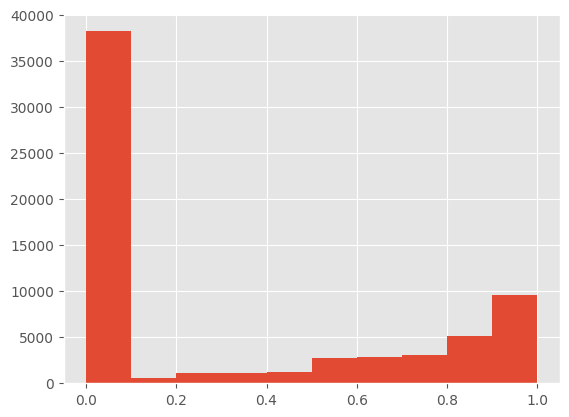

In [72]:
aux_df.response_score.hist();

In [73]:
# Add `offer_viewed` and `offer_completed` columns with binery values
aux_df['offer_viewed'] = aux_df.offer_viewed_time.apply(lambda x: 0 if pd.isnull(x) else 1)
aux_df['offer_completed'] = aux_df.offer_completed_time.apply(lambda x: 0 if pd.isnull(x) else 1)

In [75]:
aux_df[['offer_viewed_time', 'offer_completed_time', 'offer_viewed', 'offer_completed']].head(10)

offer_viewed_time  offer_completed_time  offer_viewed  offer_completed
0                6.0                 132.0             1                1
1                NaN                   NaN             0                0
2               48.0                   NaN             1                0
3               30.0                  66.0             1                1
4                NaN                   NaN             0                0
5               18.0                   NaN             1                0
6               96.0                 156.0             1                1
7                NaN                   NaN             0                0
8                NaN                   NaN             0                0
9                NaN                   NaN             0                0

In [76]:
# Add `redeemed_reward` columns
aux_df['redeemed_reward'] = aux_df.offered_reward * aux_df.offer_completed

In [77]:
# Create dummy dataframes each with different selection of columns and aggregator

alpha_df = aux_df[[
    'customer_id',
    'offer_received',
    'offer_viewed',
    'offer_completed',
    'channel_web',
    'channel_email',
    'channel_mobile',
    'channel_social',
    ]].groupby('customer_id', as_index=True).sum().fillna(0)

beta_df = aux_df[[
    'customer_id',
    'difficulty',
    'duration',
    'offered_reward',
    'redeemed_reward',
    'response_score',
    ]].groupby('customer_id', as_index=True).mean().fillna(0)

gamma_df = u.split_columns_by_offer_type(aux_df, [
    'offer_received',
    'offer_viewed',
    'offer_completed',
    'response_score',
    ])

In [78]:
# Create the final dataset `coe`
coe = pd.merge(profile.set_index('customer_id'), alpha_df, left_index=True, right_index=True)
coe = pd.merge(coe, beta_df, left_index=True, right_index=True)
coe = pd.merge(coe, gamma_df, left_index=True, right_index=True)

coe.reset_index(inplace=True)

In [79]:
# Add empty object column to store `output_value` list of function
coe['output_value'] = ''

# Apply u.get_transactions_allotment to each row
coe.output_value = coe.apply(
    lambda x: u.get_transactions_allotment(x, aux_df, transactions_df), axis=1)

# Expand `output_value` list to columns
coe = u.expand_list_to_columns(coe, 'output_value', {
    0: 'txn_overall',
    1: 'amt_overall',
    2: 'txn_promo',
    3: 'amt_promo',
    4: 'txn_nonpromo',
    5: 'amt_nonpromo',
    6: 'recency_promo',
    7: 'recency_nonpromo'})

# Add remaining required components for RFM score
coe['monetary_promo'] = np.round(coe.amt_promo / coe.txn_promo, 2)
coe['monetary_nonpromo'] = np.round(coe.amt_nonpromo / coe.txn_nonpromo, 2)

coe['frequency_promo'] = np.round(coe.recency_promo / coe.txn_promo, 2)
coe['frequency_nonpromo'] = np.round(coe.recency_nonpromo / coe.txn_promo, 2)

In [80]:
# Run u.add_rfm_paradigm on the dataset to perform necessary computations
coe = u.add_rfm_scores(coe)

In [82]:
coe[['rfm_promo_score', 'rfm_nonpromo_score']].head(10)

rfm_promo_score  rfm_nonpromo_score
0             4.67                4.00
1             2.67                4.33
2             4.33                4.00
3             1.67                0.00
4             2.33                0.00
5             3.67                0.00
6             3.00                0.00
7             3.33                0.00
8             3.67                3.67
9             3.00                1.33

In [83]:
# Add three more calculated columns describing customers attributes
coe['amt_per_test_hour'] = np.round(coe.amt_overall / transactions_df.time.max(), 6)
coe['amt_per_member_day'] = np.round(coe.amt_overall / coe.days_member, 6)
coe['amt_per_income'] = np.round(coe.amt_overall / coe.income, 6)

In [84]:
# Drop 'customer_id' column; not needed in the model
coe.drop(columns='customer_id', inplace=True)

In [85]:
coe.shape

(14608, 39)

In [86]:
coe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14608 entries, 0 to 14607
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   txn_overall           14608 non-null  float64
 1   amt_overall           14608 non-null  float64
 2   txn_promo             14608 non-null  float64
 3   amt_promo             14608 non-null  float64
 4   txn_nonpromo          14608 non-null  float64
 5   amt_nonpromo          14608 non-null  float64
 6   gender                14608 non-null  int64  
 7   age                   14608 non-null  int64  
 8   income                14608 non-null  float64
 9   days_member           14608 non-null  int64  
 10  offer_received        14608 non-null  int64  
 11  offer_viewed          14608 non-null  int64  
 12  offer_completed       14608 non-null  int64  
 13  channel_web           14608 non-null  int64  
 14  channel_email         14608 non-null  int64  
 15  channel_mobile     

In [88]:
coe.head(15)

txn_overall  amt_overall  txn_promo  amt_promo  txn_nonpromo  amt_nonpromo  gender  age    income  days_member  offer_received  offer_viewed  offer_completed  channel_web  channel_email  channel_mobile  channel_social  difficulty  duration  offered_reward  redeemed_reward  response_score  bogo_offer_received  disc_offer_received  info_offer_received  bogo_offer_viewed  disc_offer_viewed  info_offer_viewed  bogo_offer_completed  disc_offer_completed  info_offer_completed  bogo_response_score  disc_response_score  info_response_score  rfm_promo_score  rfm_nonpromo_score  amt_per_test_hour  amt_per_member_day  amt_per_income
0           3.0        77.01        1.0      23.22           2.0         53.79       0   55  112000.0         2607               2             0                0            2              2               2               0    2.500000  5.500000        2.500000         0.000000        0.000000                  1.0                  0.0                  1.0                0.0           0.000000                0.0                   0.0              0.000000                   0.0                 0.00                0.000                0.000             4.67                4.00           0.107857            0.029540        0.000688
1           7.0       159.27        6.0     135.34           1.0         23.93       0   75  100000.0         2674               4             4                3            2              4               4               3    5.000000  5.500000        5.000000         3.750000        0.390000                  3.0                  0.0                  1.0                3.0           0.000000                1.0                   2.0              0.000000                   1.0                 0.64                0.000                0.920             2.67                4.33           0.223067            0.059562        0.001593
2           3.0        57.73        1.0      18.42           2.0         39.31       1   68   70000.0         2322               4             3                2            4              4               4               1    6.250000  7.000000        2.250000         1.750000        0.347500                  1.0                  2.0                  1.0                1.0           2.000000                0.0                   1.0              1.000000                   0.0                 0.39                1.000                0.000             4.33                4.00           0.080854            0.024862        0.000825
3           3.0        36.43        3.0      36.43           0.0          0.00       1   65   53000.0         2398               6             6                5            6              6               6               3    6.666667  6.833333        4.000000         3.166667        0.405000                  2.0                  2.0                  0.0                2.0           2.000000                0.0                   1.5              2.000000                   0.0                 0.67                1.090                0.000             1.67                0.00           0.051022            0.015192        0.000687
4           4.0        15.62        4.0      15.62           0.0          0.00       1   58   51000.0         2488               3             2                1            3              3               3               2    5.666667  7.000000        1.666667         0.666667        0.183333                  0.0                  2.0                  1.0                0.0           2.000000                0.0                   0.0              1.000000                   0.0                 0.00                0.550                0.000             2.33                0.00           0.021877            0.006278        0.000306
5           6.0        85.55        6.0      85.55           0.0          0.00       0   61   57000.0         2549               5             5                2            3              5           

In [89]:
u.compute_null_pct(coe)

              column  count  pct
         txn_overall      0  0.0
         amt_overall      0  0.0
           txn_promo      0  0.0
           amt_promo      0  0.0
        txn_nonpromo      0  0.0
        amt_nonpromo      0  0.0
              gender      0  0.0
                 age      0  0.0
              income      0  0.0
         days_member      0  0.0
      offer_received      0  0.0
        offer_viewed      0  0.0
     offer_completed      0  0.0
         channel_web      0  0.0
       channel_email      0  0.0
      channel_mobile      0  0.0
      channel_social      0  0.0
          difficulty      0  0.0
            duration      0  0.0
      offered_reward      0  0.0
     redeemed_reward      0  0.0
      response_score      0  0.0
 bogo_offer_received      0  0.0
 disc_offer_received      0  0.0
 info_offer_received      0  0.0
   bogo_offer_viewed      0  0.0
   disc_offer_viewed      0  0.0
   info_offer_viewed      0  0.0
bogo_offer_completed      0  0.0
disc_offer

Modelling and Evaluation

In [90]:
# Apply PowerTransformer and PCA to data

# Instantiate transformers object
est = PowerTransformer()
pca = PCA()

# Store transformation result in dataframe
coe_pca = pd.DataFrame(
    pca.fit_transform(est.fit_transform(coe)),
    columns=coe.columns, index=coe.index)

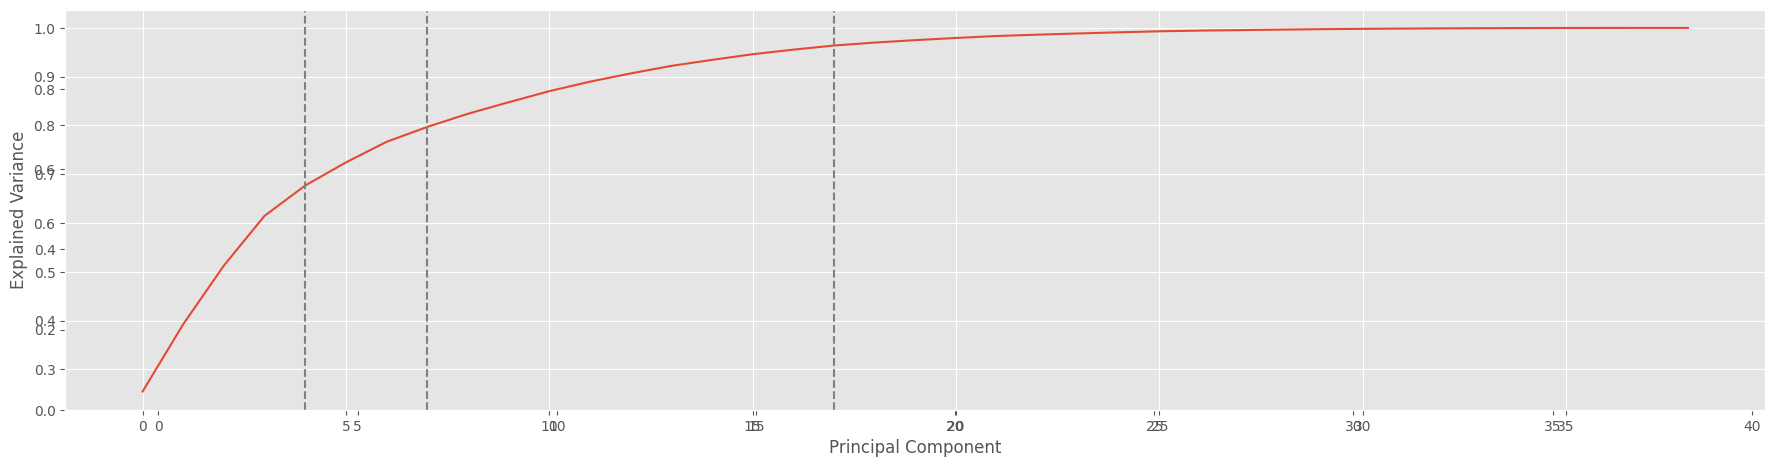

Minimum n_components required for 55% explained variance: 4
Minimum n_components required for 75% explained variance: 7
Minimum n_components required for 95% explained variance: 17


In [91]:
# Investigate the variance accounted for by each principal component

fig = plt.figure(figsize=(17,4))

ax1 = fig.add_axes([0,0,1,1])
ax1.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

ax2 = fig.add_axes([0,0,1,1])
ax2.plot(np.cumsum(pca.explained_variance_ratio_))

ev_list = [0.55, 0.75, 0.95]
n_components_list = []

for ev in ev_list:
    n_components = min(np.where(np.cumsum(pca.explained_variance_ratio_)>ev)[0]+1)
    ax1.axhline(ev, linestyle='dashed', color='grey')
    ax2.axvline(n_components, linestyle='dashed', color='grey')
    n_components_list.append(n_components)

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

plt.show()

for ev, nc in zip(ev_list, n_components_list):
    print(f'Minimum n_components required for {int(ev*100)}% explained variance: {nc}')

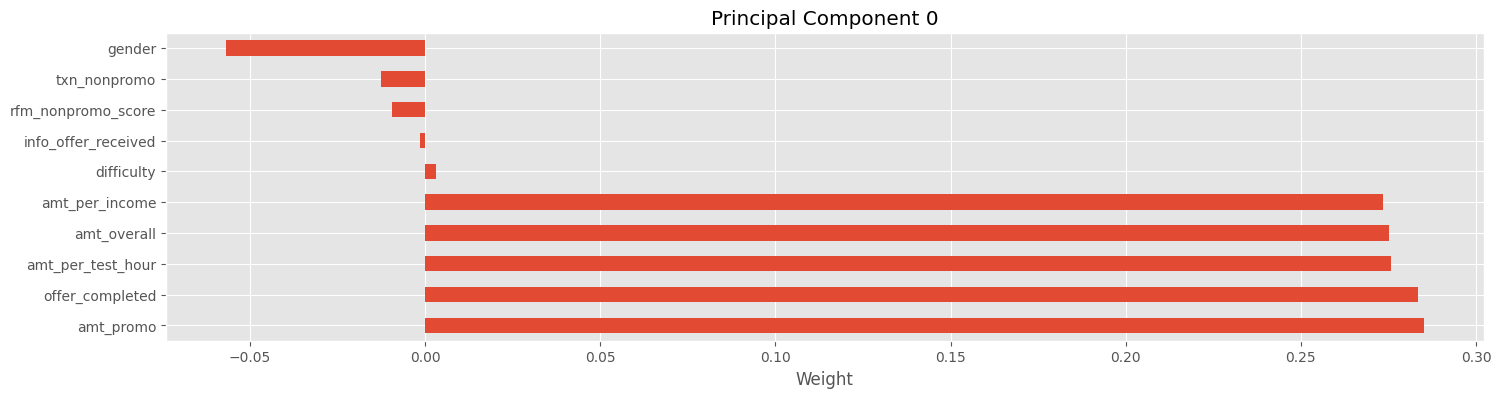

In [94]:
# Investigate the first principal component
u.plot_pca_component(coe, pca, 0)

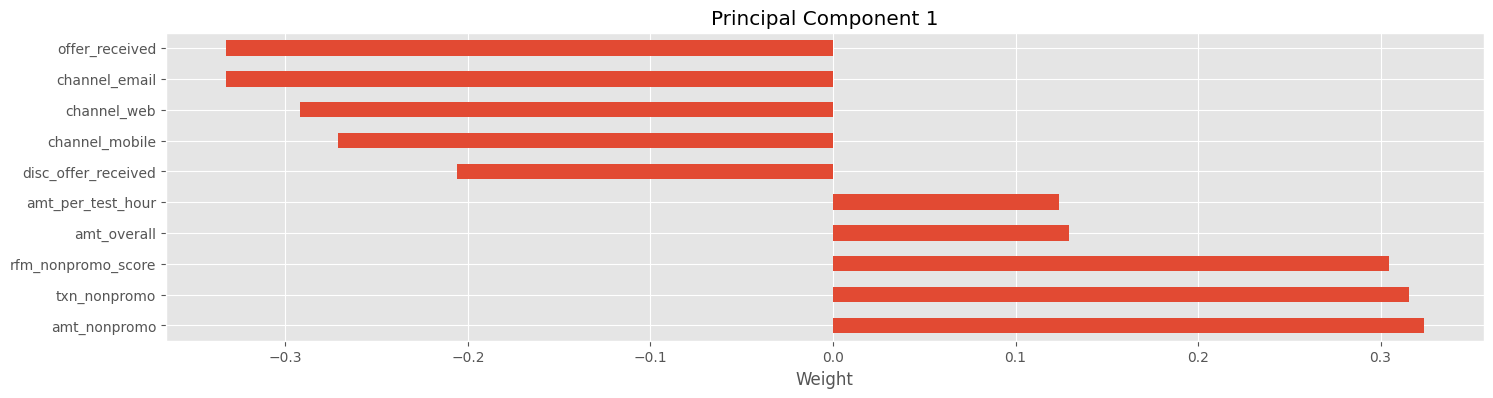

In [95]:
# Investigate the first principal component
u.plot_pca_component(coe, pca, 1)

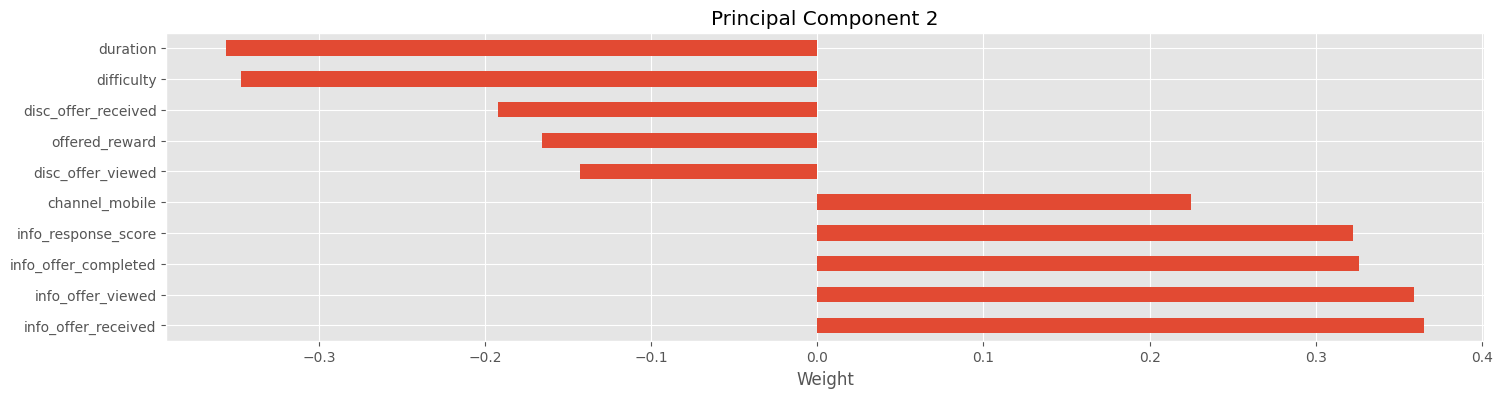

In [96]:
# Investigate the first principal component
u.plot_pca_component(coe, pca, 2)

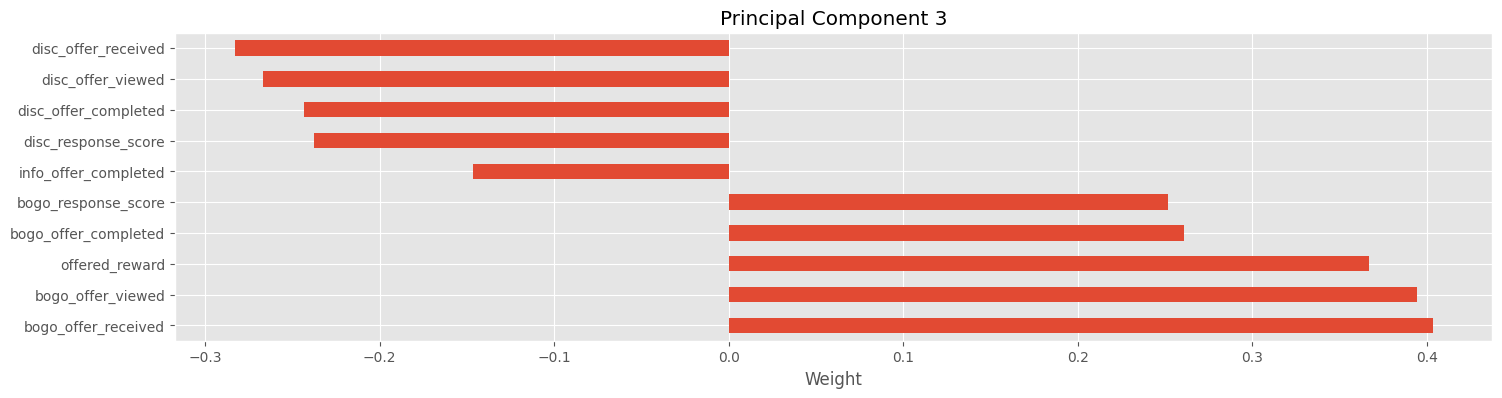

In [97]:
# Investigate the first principal component
u.plot_pca_component(coe, pca, 3)

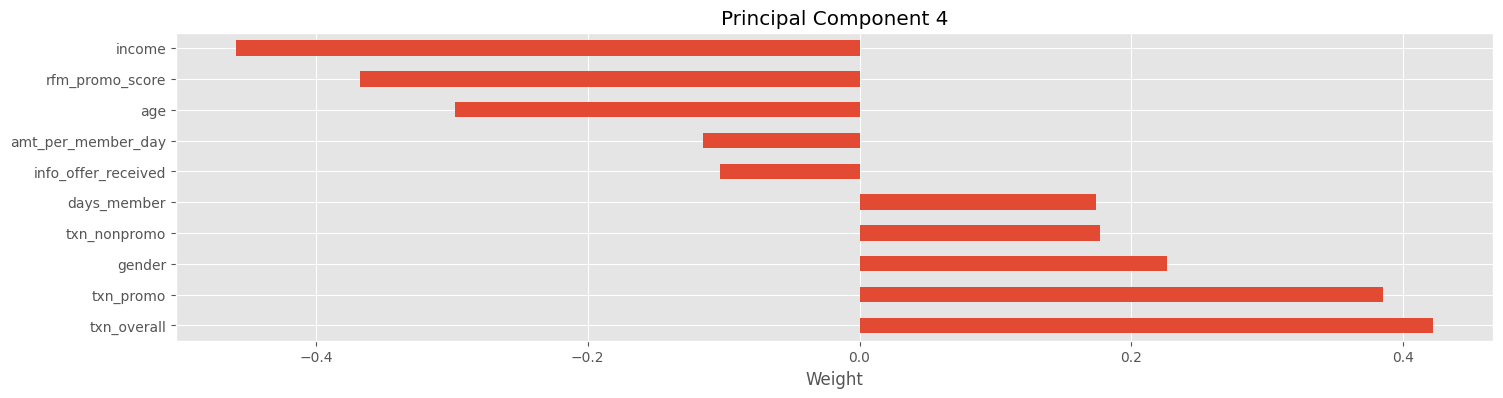

In [98]:
# Investigate the first principal component
u.plot_pca_component(coe, pca, 4)

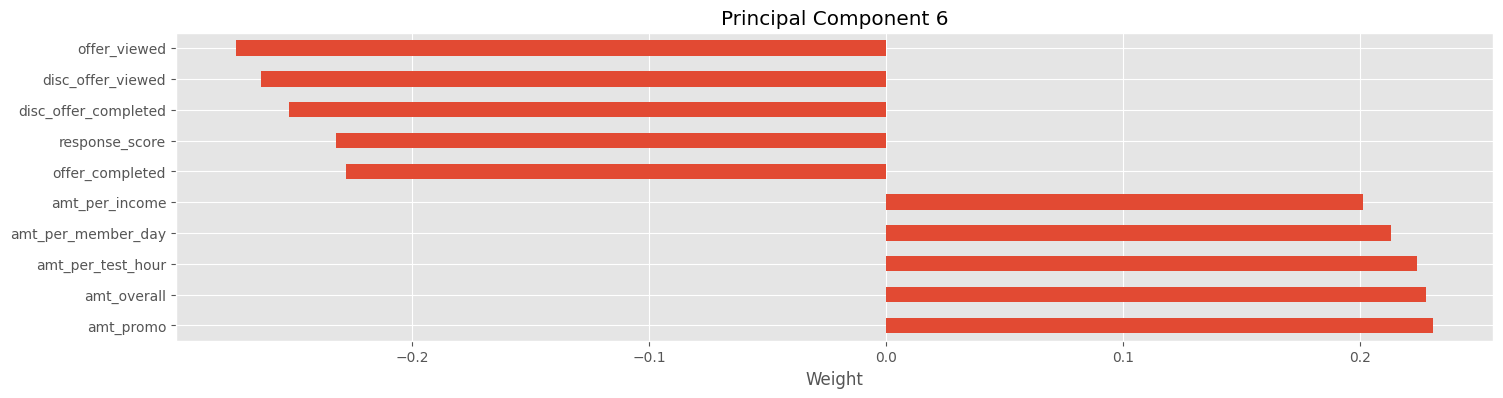

In [99]:
# Investigate the first principal component
u.plot_pca_component(coe, pca, 6)

Finding number of optimal clusters

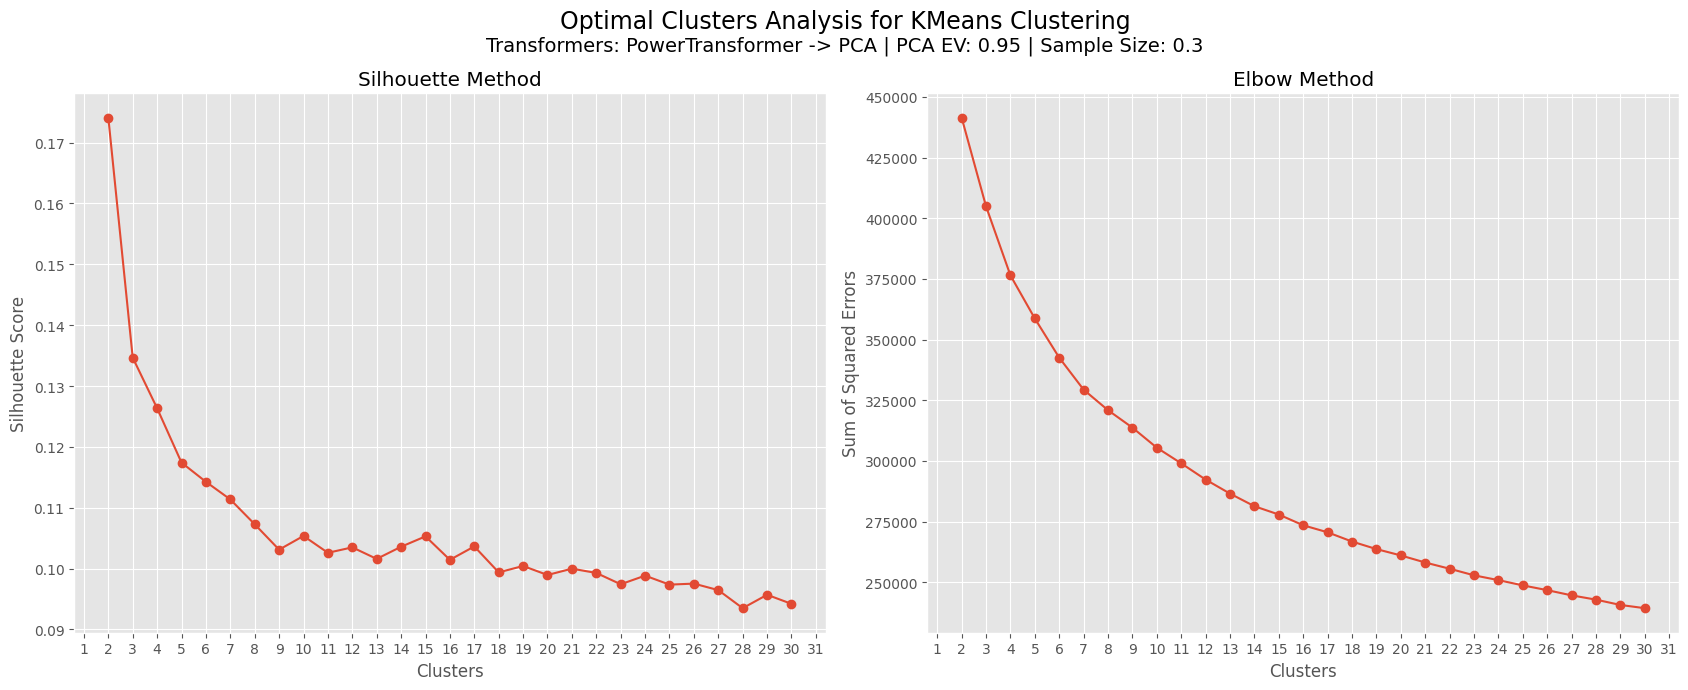

In [101]:
# Investigate change in SC and SSE across number of clusters
u.plot_optimization_analysis(
    df = coe,
    ev = 0.95,
    sample_size = 0.3)

performing silhouette analysis

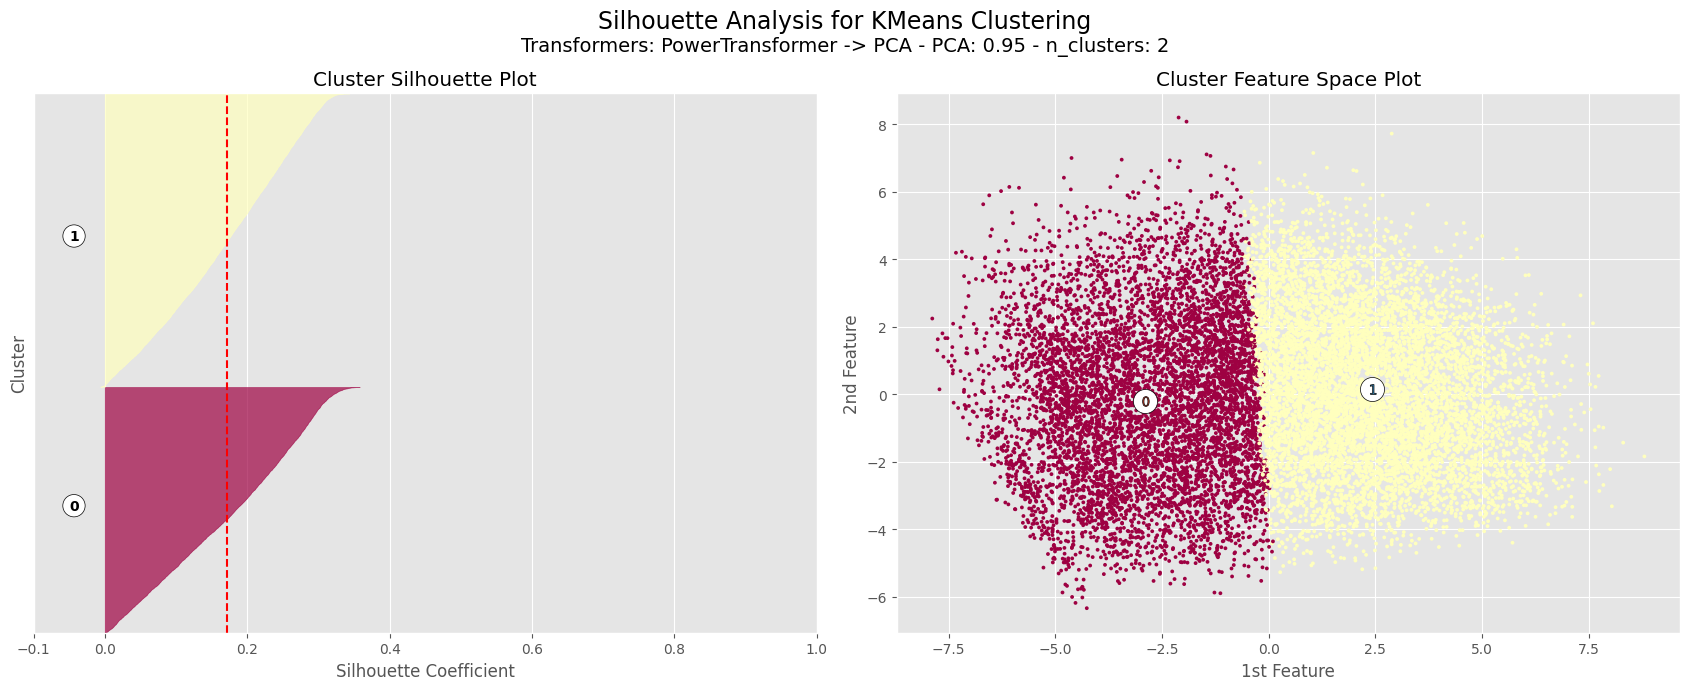

In [102]:
# Investigate silhouette analysis plot with n_clusters=2
u.plot_silhouette_analysis(
    df = coe,
    ev = 0.95,
    n_clusters = 2)

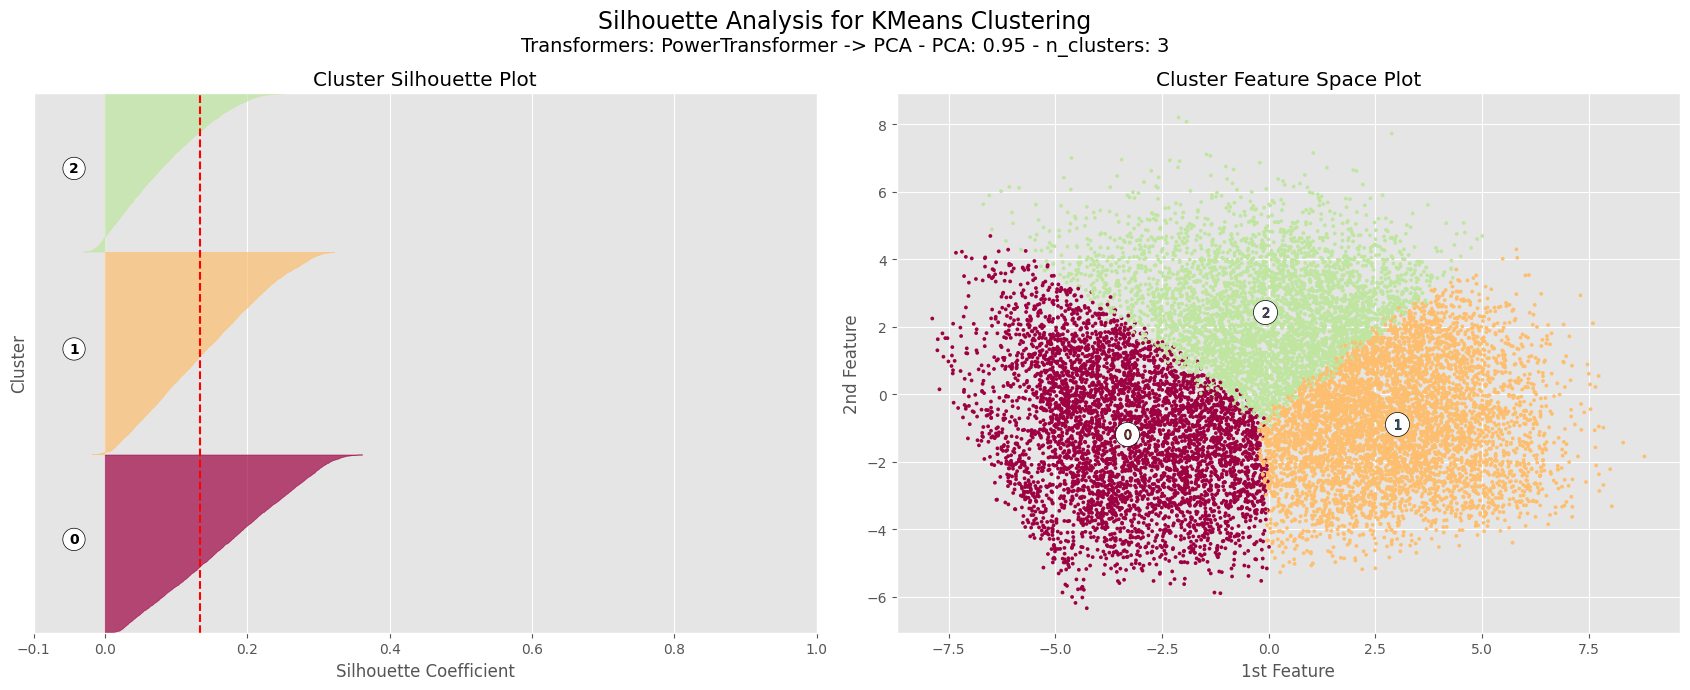

In [103]:
# Investigate silhouette analysis plot with n_clusters=3
u.plot_silhouette_analysis(
    df = coe,
    ev = 0.95,
    n_clusters = 3)

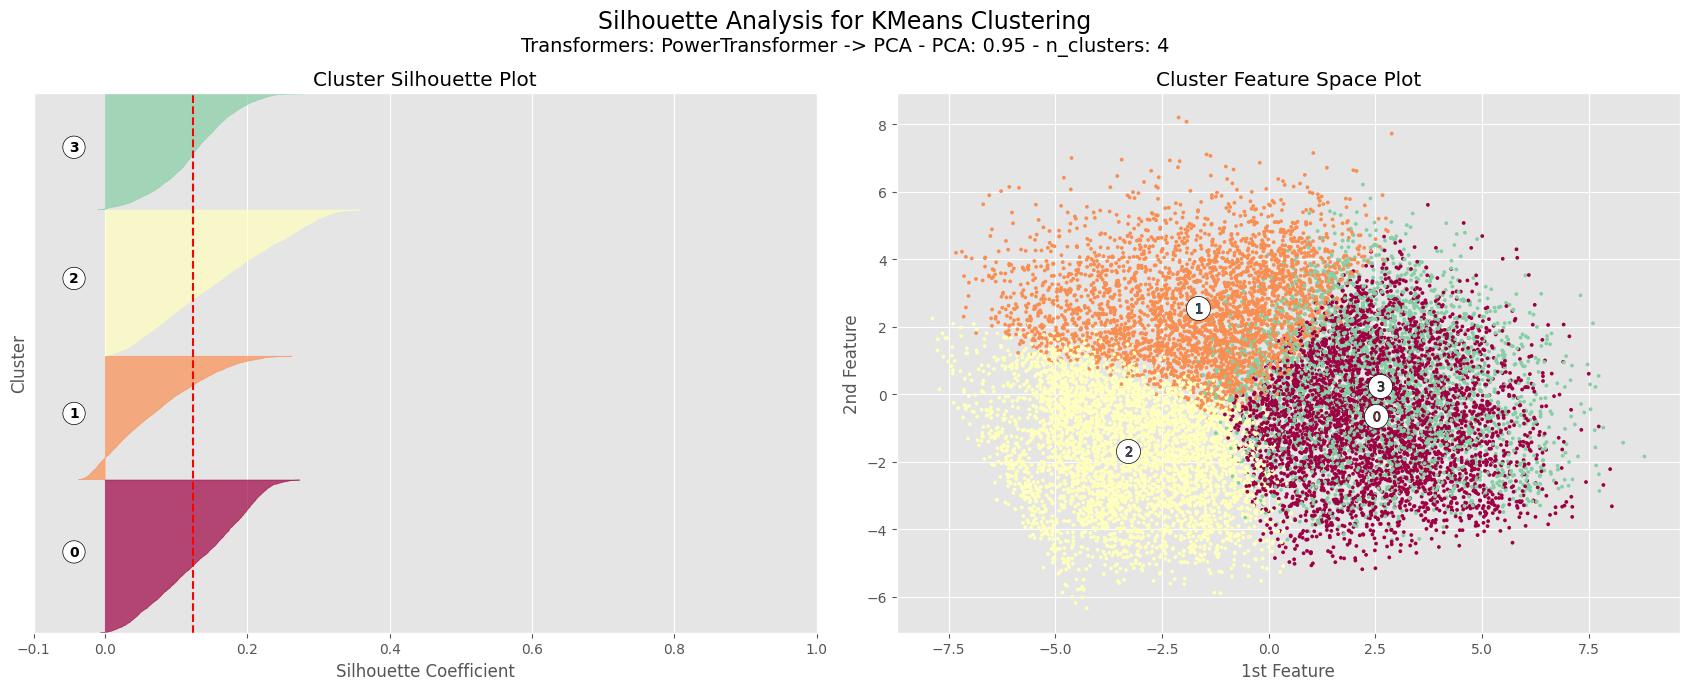

In [108]:
# Investigate silhouette analysis plot with n_clusters=3
u.plot_silhouette_analysis(
    df = coe,
    ev = 0.95,
    n_clusters = 4)

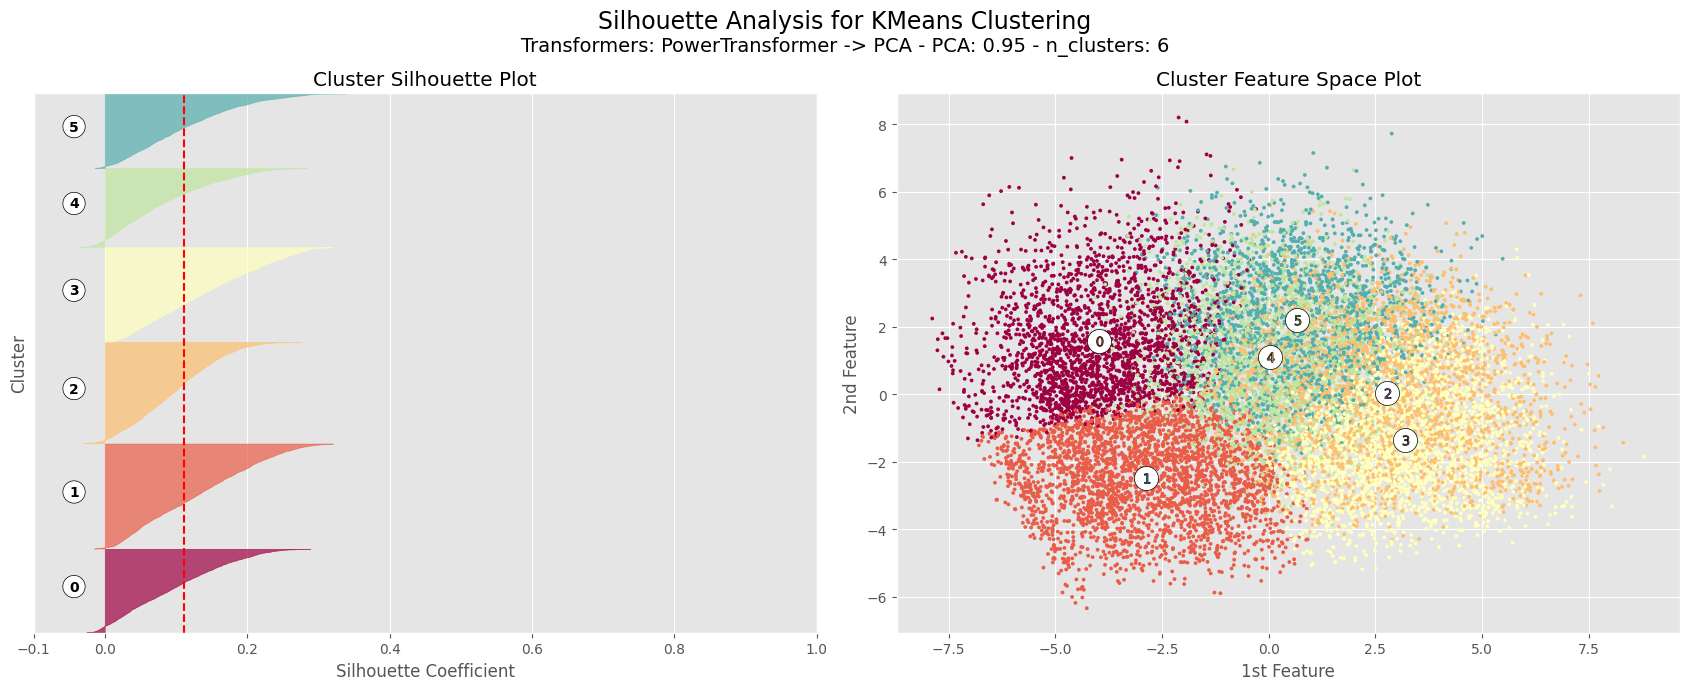

In [107]:
# Investigate silhouette analysis plot with n_clusters=3
u.plot_silhouette_analysis(
    df = coe,
    ev = 0.95,
    n_clusters = 6)

Model Implementation

In [109]:
# Set desired parameters
n_clusters = 6
ev = 0.95
est = 'KMeans'

# Transform, fit, and predict
X = u.transform_data(coe, ev)
model, labels = u.fit_predict_data(X, n_clusters, est)

# Store predicted labels in `coe` dataframe
coe['cluster'] = labels

print(f'{est} with {n_clusters} Clusters\n', 'Silhouette Score: ', np.round(silhouette_score(X, labels), 2))

KMeans with 6 Clusters
 Silhouette Score:  0.11


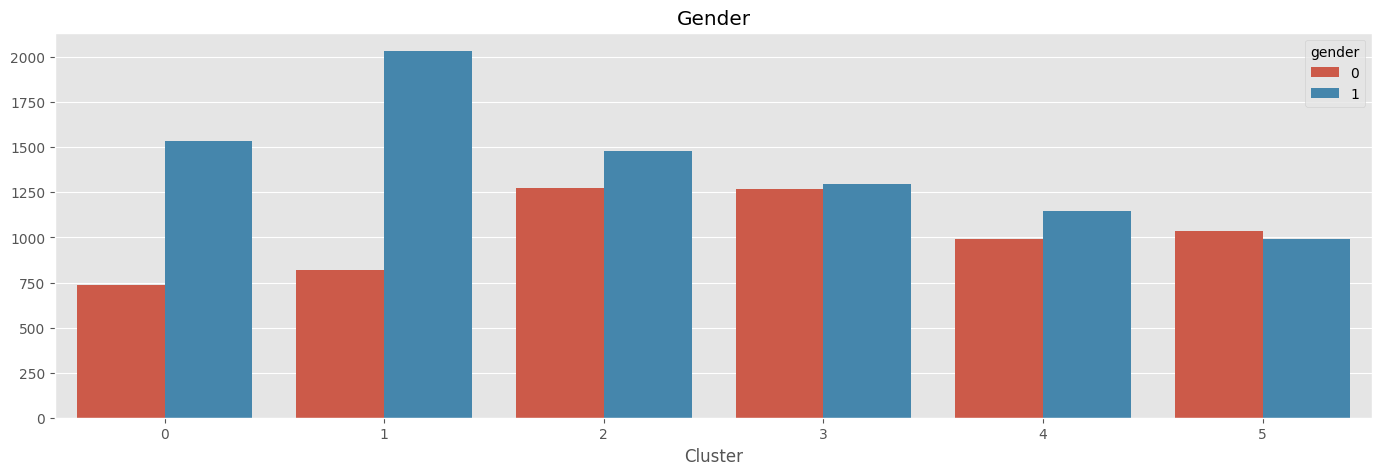

 cluster  mean  min  median  max
       0  0.68  0.0     1.0  1.0
       1  0.71  0.0     1.0  1.0
       2  0.54  0.0     1.0  1.0
       3  0.51  0.0     1.0  1.0
       4  0.54  0.0     1.0  1.0
       5  0.49  0.0     0.0  1.0


In [110]:
# Investigate `gender` distribution in clusters
u.plot_cluster_analysis(plot='countplot', df=coe,
                        target_columns='gender',
                        title='Gender')

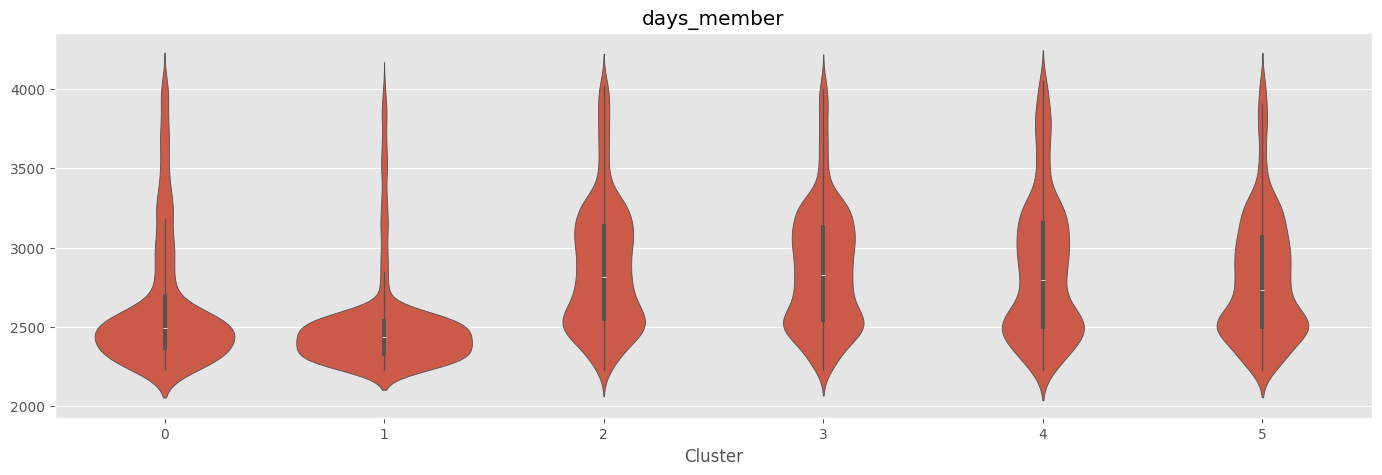

 cluster    mean    min  median    max
       0 2629.20 2231.0  2492.0 4053.0
       1 2505.05 2231.0  2434.0 4041.0
       2 2878.85 2231.0  2817.5 4053.0
       3 2868.93 2231.0  2829.0 4054.0
       4 2868.78 2231.0  2798.5 4050.0
       5 2807.95 2231.0  2732.0 4053.0


In [111]:
# Investigate `age`
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns='days_member',
                        title='days_member')

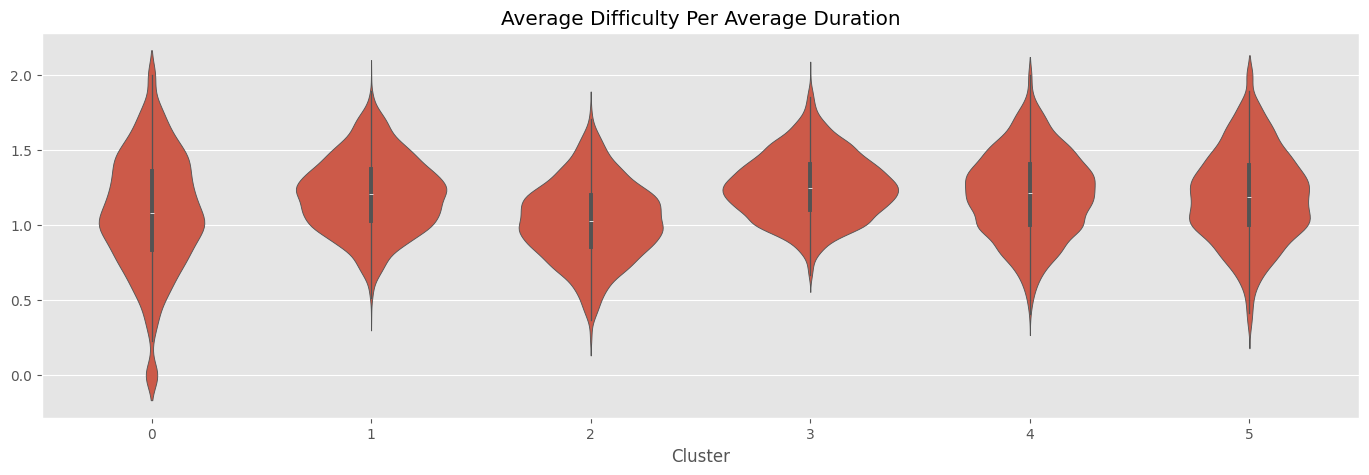

 cluster  mean  min  median  max
       0  1.08 0.00    1.08 2.00
       1  1.21 0.40    1.21 2.00
       2  1.03 0.24    1.03 1.79
       3  1.26 0.65    1.25 2.00
       4  1.21 0.39    1.21 2.00
       5  1.19 0.31    1.19 2.00


In [112]:
# Investigate average `difficulty` per average `duration`
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns=['duration', 'difficulty'],
                        title='Average Difficulty Per Average Duration')

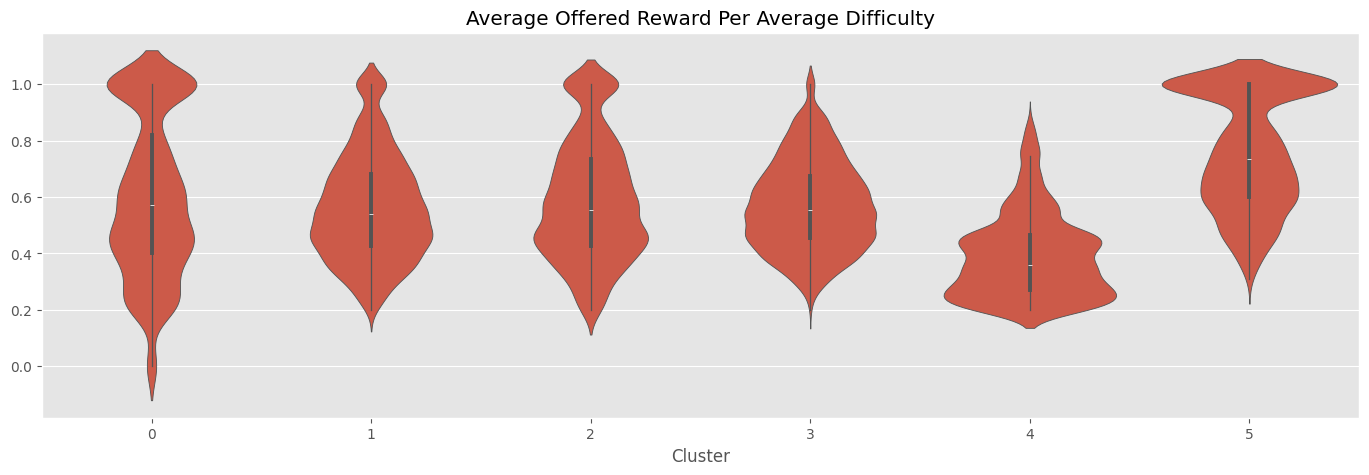

 cluster  mean  min  median  max
       0  0.59 0.00    0.57 1.00
       1  0.56 0.20    0.54 1.00
       2  0.59 0.20    0.56 1.00
       3  0.57 0.20    0.56 1.00
       4  0.39 0.20    0.36 0.88
       5  0.76 0.31    0.73 1.00


In [113]:
# Investigate average `offered_reward` per average `difficulty`
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns=['difficulty', 'offered_reward'],
                        title='Average Offered Reward Per Average Difficulty')

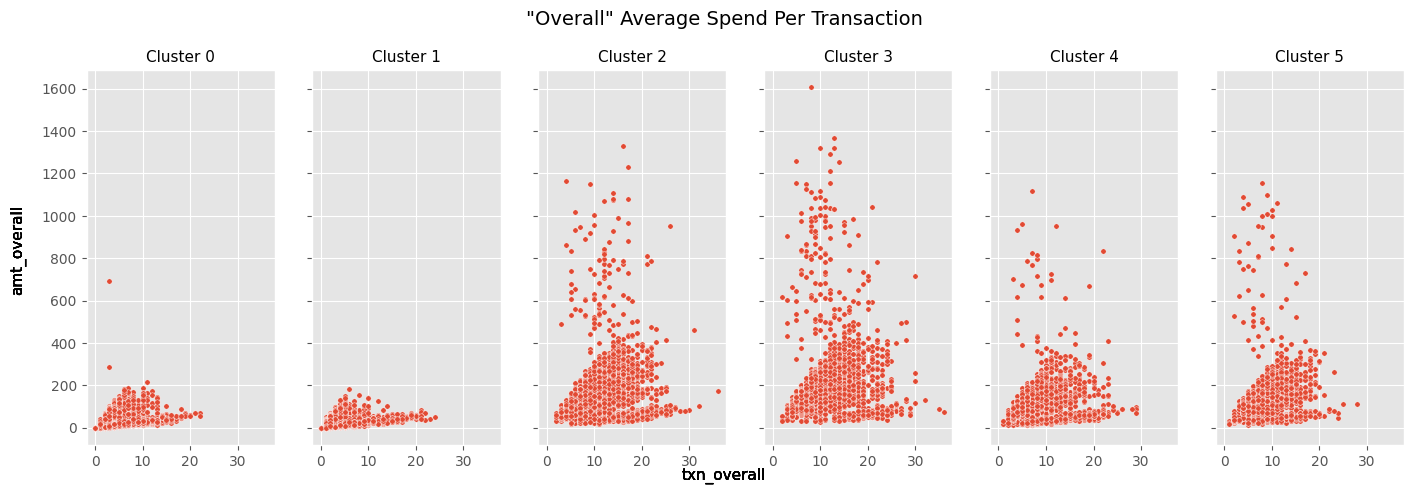

 cluster  mean  min  median    max
       0  8.76 0.00    3.79 231.27
       1  6.69 0.00    3.28  50.08
       2 17.16 1.65   15.94 291.32
       3 21.21 1.60   18.84 307.93
       4 16.86 1.42   16.67 234.63
       5 20.33 1.67   18.68 451.47


In [114]:
# Investigate "overall" average spend per transaction
u.plot_cluster_analysis(plot='scatterplot', df=coe,
                        target_columns=['txn_overall', 'amt_overall'],
                        title='"Overall" Average Spend Per Transaction')

In [115]:
# Investigate idle customers (with zero transactions) in `txn_overall`
u.compute_nil_pct(df=coe, target_column='txn_overall')

 cluster  pct
       0  3.2
       1  8.9
       2  0.0
       3  0.0
       4  0.0
       5  0.0


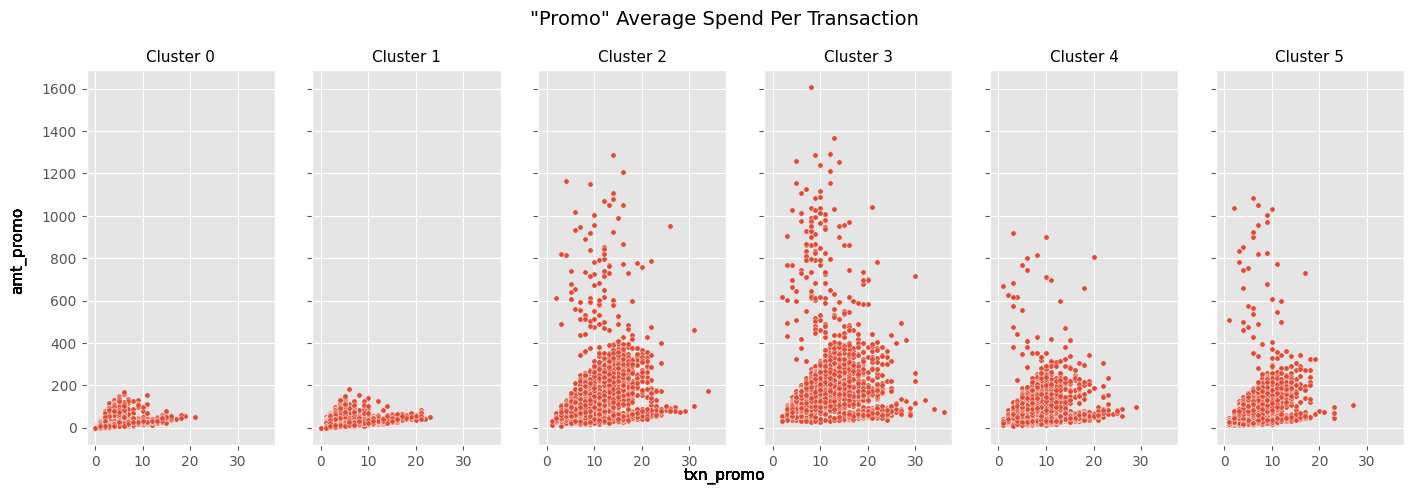

 cluster  mean  min  median    max
       0  7.58 0.00    3.42  39.22
       1  6.58 0.00    3.24  50.08
       2 17.19 1.65   15.88 307.20
       3 21.37 1.60   18.77 307.93
       4 17.34 1.41   16.64 666.86
       5 20.11 1.74   18.45 518.32


In [116]:
# Investigate "promo" average spend per transaction
u.plot_cluster_analysis(plot='scatterplot', df=coe,
                        target_columns=['txn_promo', 'amt_promo'],
                        title='"Promo" Average Spend Per Transaction')

In [117]:
# Investigate idle customers (with zero transactions) in `txn_promo`
u.compute_nil_pct(df=coe, target_column='txn_promo')

 cluster  pct
       0  9.1
       1  9.6
       2  0.0
       3  0.0
       4  0.0
       5  0.0


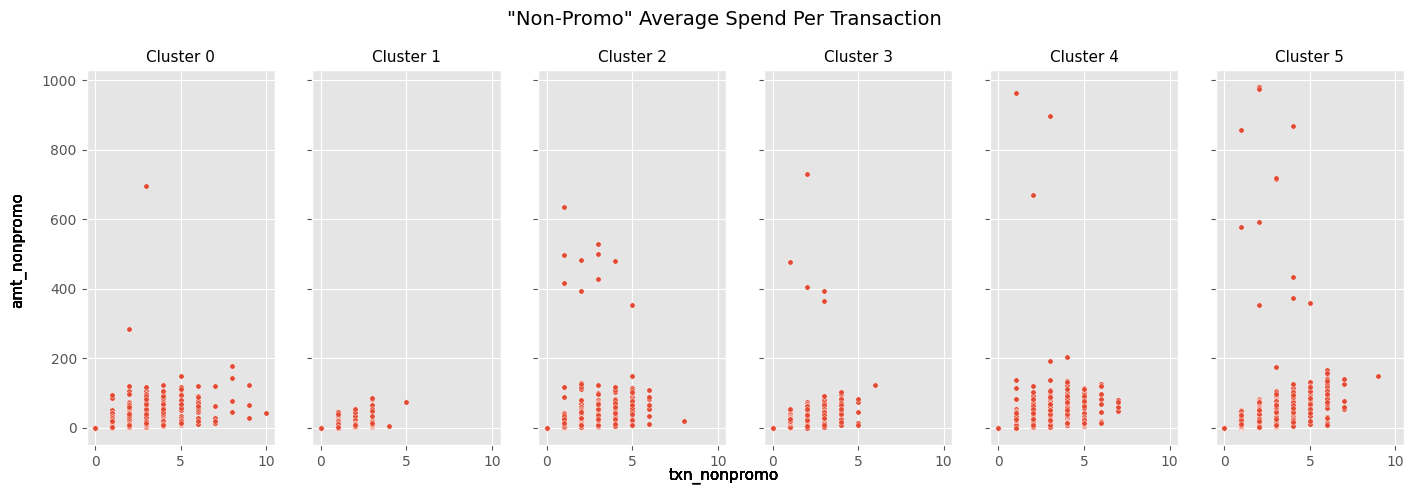

 cluster  mean  min  median    max
       0  7.66  0.0    3.46 231.27
       1  1.25  0.0    0.00  46.67
       2  8.92  0.0    2.68 635.06
       3  5.61  0.0    0.00 476.33
       4 11.66  0.0    8.21 962.10
       5 16.74  0.0   15.26 855.31


In [118]:
# Investigate "nonpromo" average spend per transaction
u.plot_cluster_analysis(plot='scatterplot', df=coe,
                        target_columns=['txn_nonpromo', 'amt_nonpromo'],
                        title='"Non-Promo" Average Spend Per Transaction')

In [119]:
# Investigate idle customers (with zero transactions) in `txn_nonpromo`
u.compute_nil_pct(df=coe, target_column='txn_nonpromo')

 cluster  pct
       0 16.5
       1 78.7
       2 44.3
       3 68.4
       4 27.1
       5 13.5


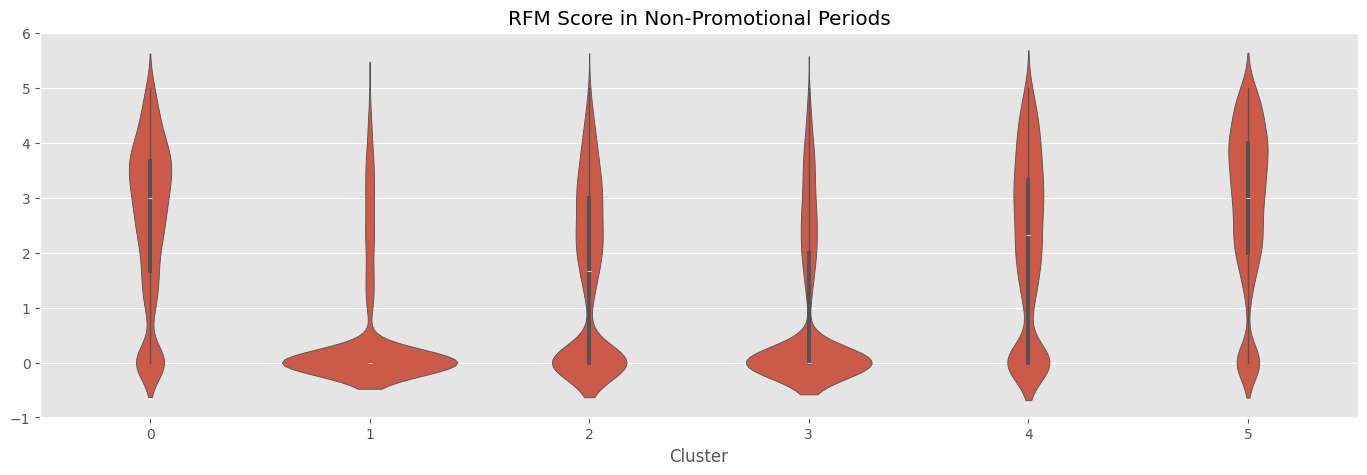

 cluster  mean  min  median  max
       0  2.58  0.0    3.00  5.0
       1  0.56  0.0    0.00  5.0
       2  1.55  0.0    1.67  5.0
       3  0.88  0.0    0.00  5.0
       4  2.15  0.0    2.33  5.0
       5  2.86  0.0    3.00  5.0


In [120]:
# Investigate RFM score in non-promotional periods
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns='rfm_nonpromo_score',
                        title='RFM Score in Non-Promotional Periods')

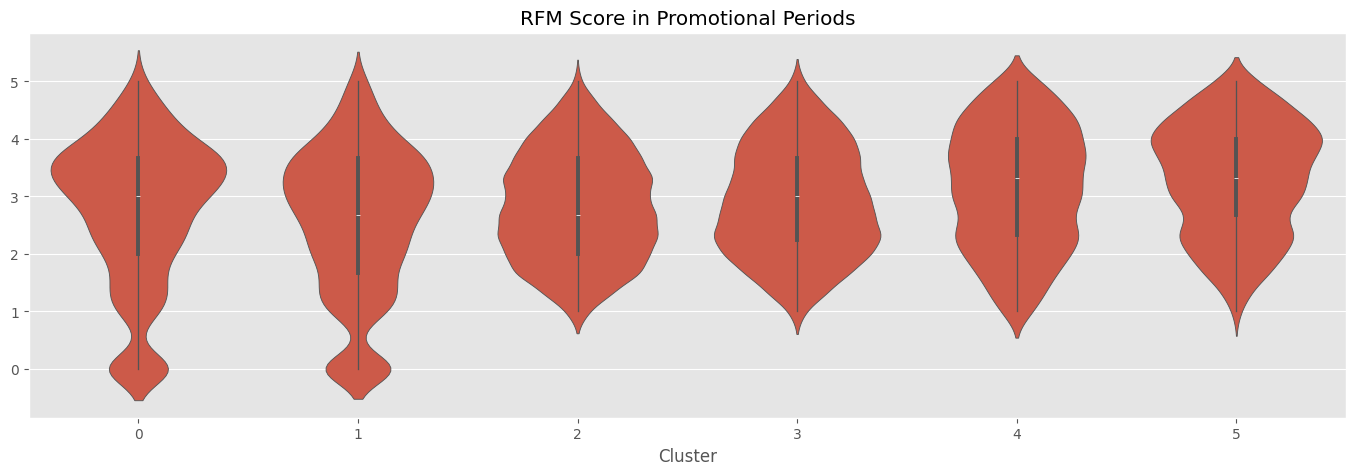

 cluster  mean  min  median  max
       0  2.76  0.0    3.00  5.0
       1  2.57  0.0    2.67  5.0
       2  2.83  1.0    2.67  5.0
       3  2.90  1.0    3.00  5.0
       4  3.14  1.0    3.33  5.0
       5  3.31  1.0    3.33  5.0


In [121]:
# # Investigate RFM score in promotional periods
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns='rfm_promo_score',
                        title='RFM Score in Promotional Periods')

In [122]:
# Investigate percentage change in center measurements
# between `rfm_nonpromo_score` and `rfm_promo_score`
u.compute_percentage_change(coe, 'rfm_nonpromo_score', 'rfm_promo_score')

 cluster  mean_initial  mean_final  mean_%chnage  median_initial  median_final  median_%chnage
       0          2.58        2.76          6.98            3.00          3.00            0.00
       1          0.56        2.57        358.93            0.00          2.67             inf
       2          1.55        2.83         82.58            1.67          2.67           59.88
       3          0.88        2.90        229.55            0.00          3.00             inf
       4          2.15        3.14         46.05            2.33          3.33           42.92
       5          2.86        3.31         15.73            3.00          3.33           11.00


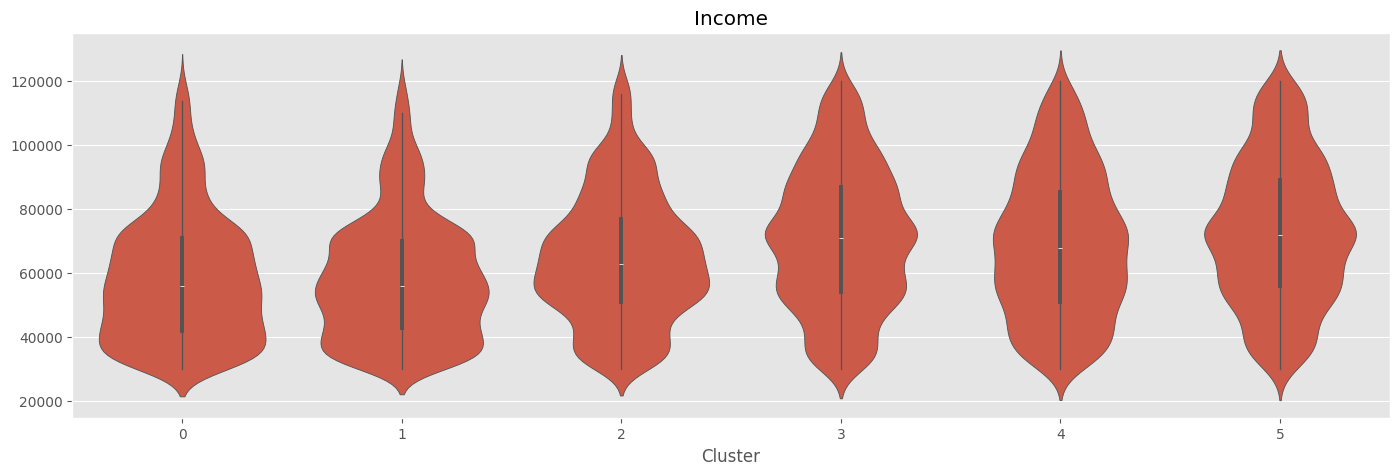

 cluster     mean     min  median      max
       0 58769.37 30000.0 56000.0 120000.0
       1 58573.43 30000.0 56000.0 119000.0
       2 64901.96 30000.0 63000.0 120000.0
       3 70944.31 30000.0 71000.0 120000.0
       4 68879.21 30000.0 68000.0 120000.0
       5 72705.19 30000.0 72000.0 120000.0


In [123]:
# Investigate `income`
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns='income',
                        title='Income')

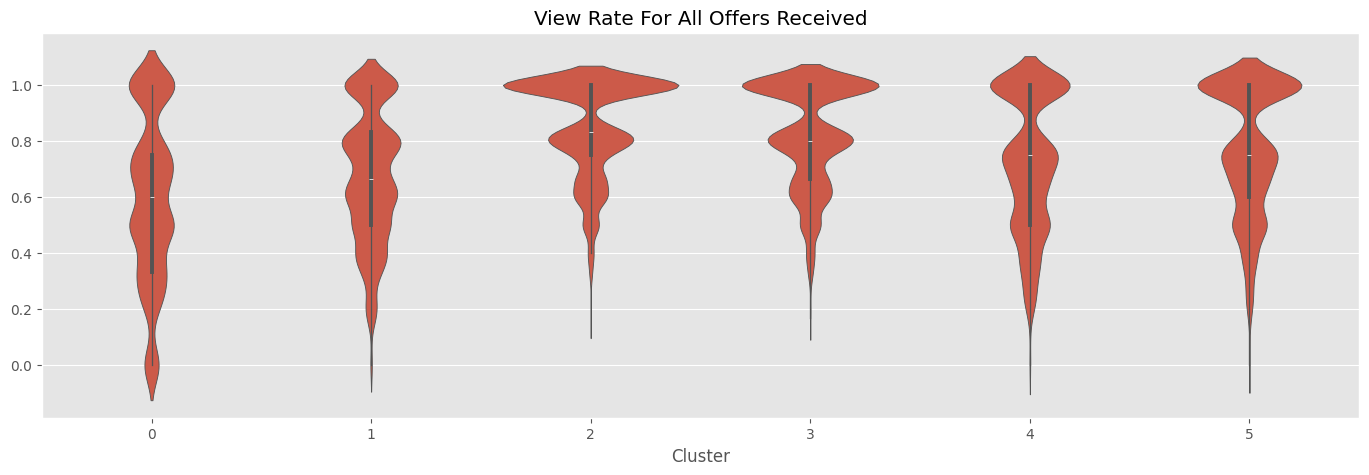

 cluster  mean  min  median  max
       0  0.60 0.00    0.60  1.0
       1  0.67 0.00    0.67  1.0
       2  0.85 0.17    0.83  1.0
       3  0.82 0.17    0.80  1.0
       4  0.72 0.00    0.75  1.0
       5  0.77 0.00    0.75  1.0


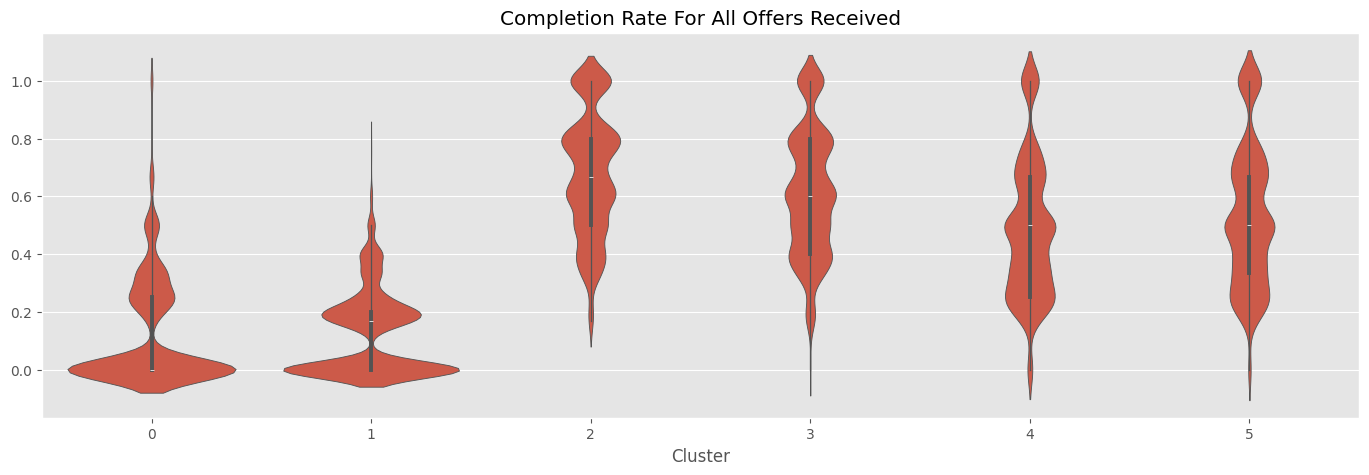

 cluster  mean  min  median  max
       0  0.13 0.00    0.00  1.0
       1  0.13 0.00    0.17  0.8
       2  0.67 0.17    0.67  1.0
       3  0.61 0.00    0.60  1.0
       4  0.48 0.00    0.50  1.0
       5  0.53 0.00    0.50  1.0


In [124]:
# Investigate viewership and completion rates as percentage of all offers received
for column, title in zip(['offer_viewed', 'offer_completed'], ['View', 'Completion']):
    u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns=['offer_received', column],
                        title=f'{title} Rate For All Offers Received')

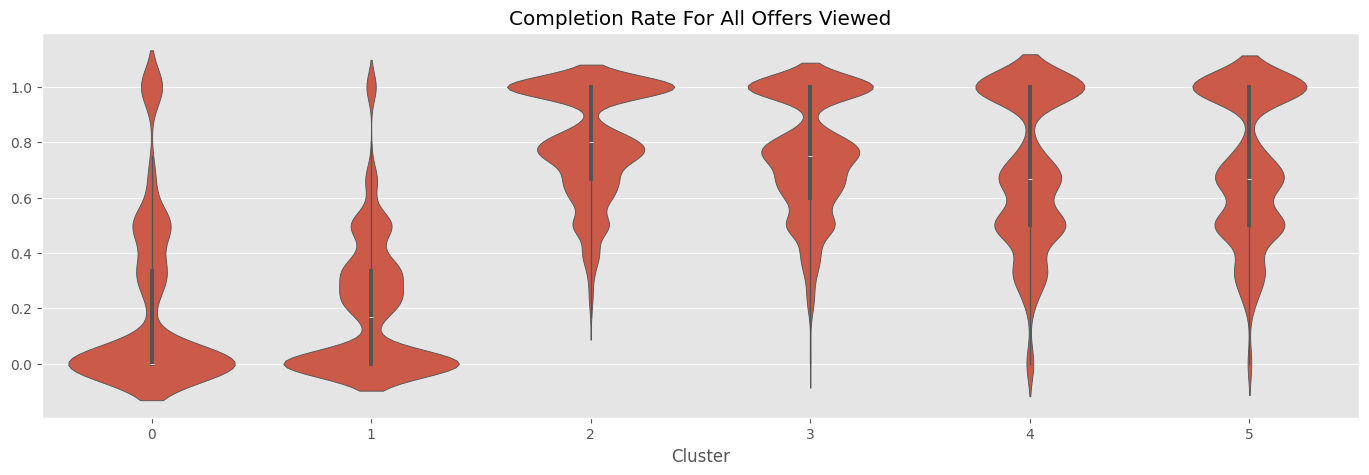

 cluster  mean  min  median  max
       0  0.21 0.00    0.00  1.0
       1  0.20 0.00    0.17  1.0
       2  0.79 0.17    0.80  1.0
       3  0.75 0.00    0.75  1.0
       4  0.69 0.00    0.67  1.0
       5  0.70 0.00    0.67  1.0


In [125]:
# Investigate completion rates as percentage of all offers viewed
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns=['offer_viewed', 'offer_completed'],
                        title='Completion Rate For All Offers Viewed')

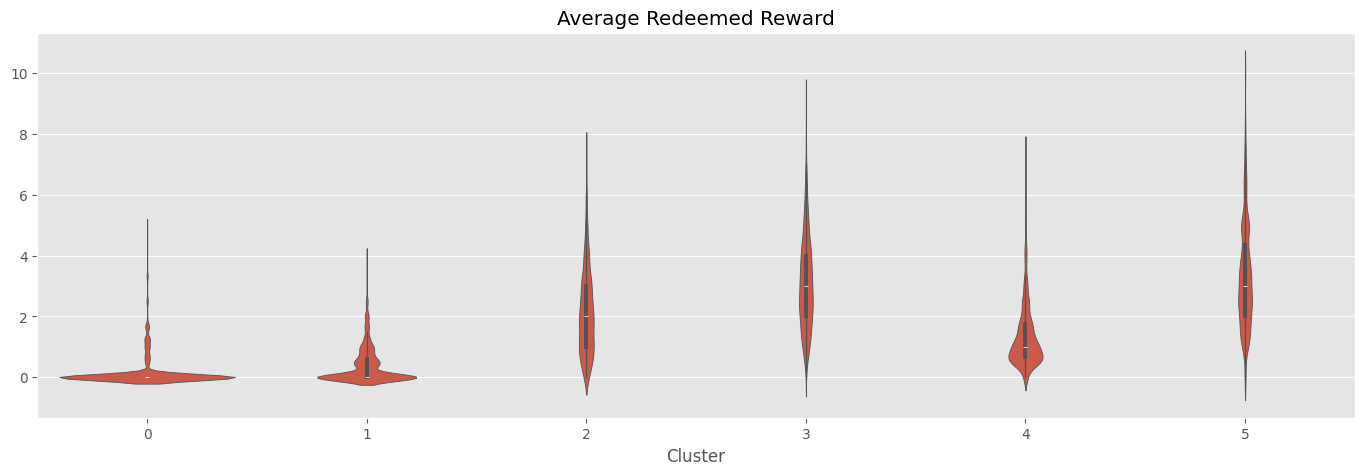

 cluster  mean  min  median   max
       0  0.16  0.0     0.0  5.00
       1  0.39  0.0     0.0  4.00
       2  2.13  0.0     2.0  7.50
       3  3.11  0.0     3.0  9.17
       4  1.33  0.0     1.0  7.50
       5  3.33  0.0     3.0 10.00


In [126]:
# Investigate average `redeemed_reward`
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns='redeemed_reward',
                        title='Average Redeemed Reward')

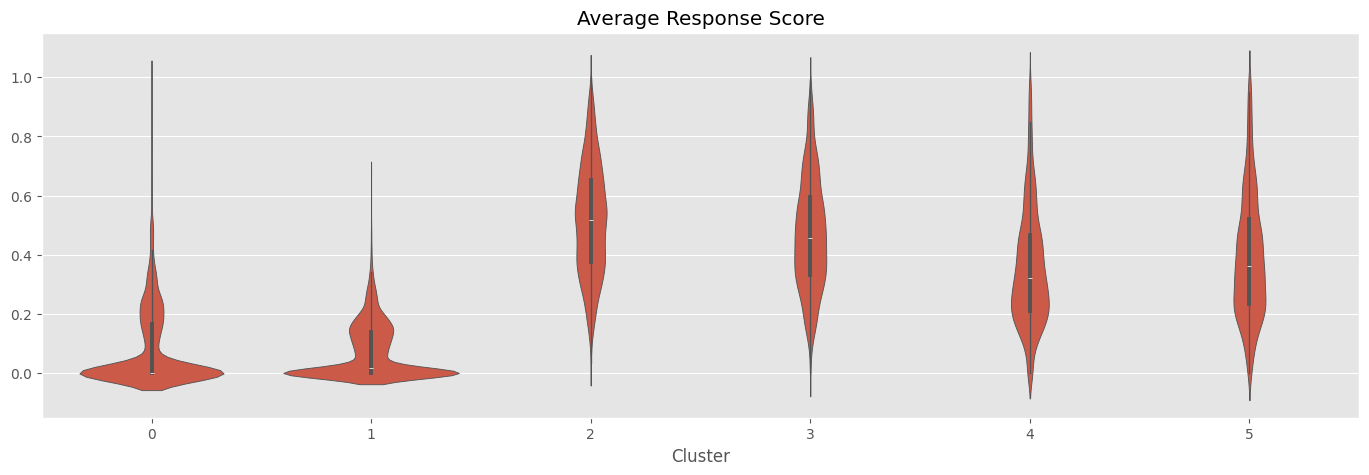

 cluster  mean  min  median  max
       0  0.08 0.00    0.00 1.00
       1  0.07 0.00    0.02 0.68
       2  0.52 0.03    0.52 1.00
       3  0.47 0.00    0.46 0.99
       4  0.36 0.00    0.32 1.00
       5  0.39 0.00    0.36 1.00


In [127]:
# Investigate average `response_score`
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns='response_score',
                        title='Average Response Score')

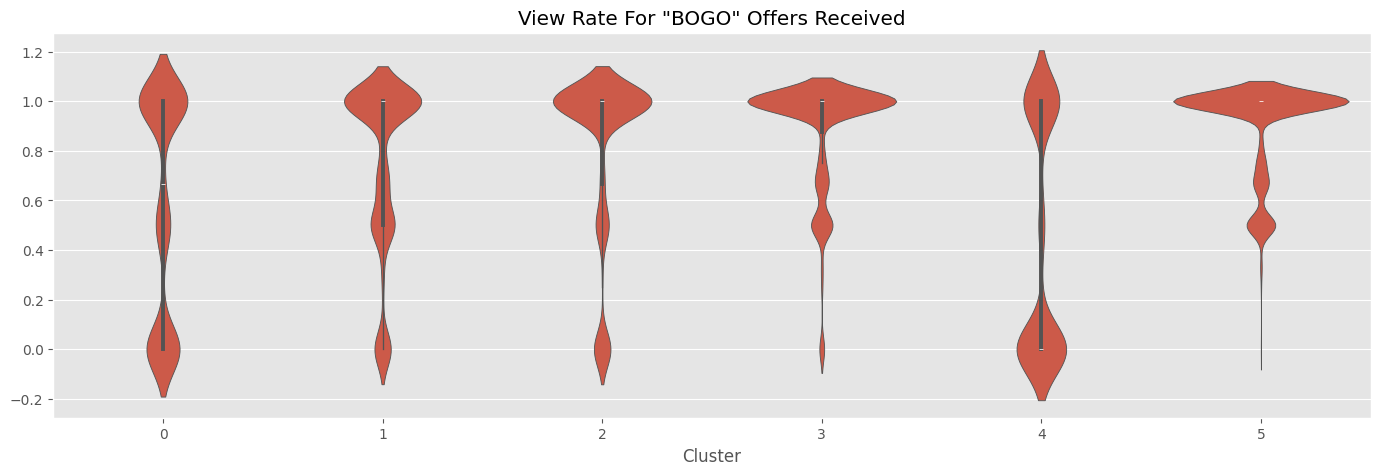

 cluster  mean  min  median  max
       0  0.58  0.0    0.67  1.0
       1  0.74  0.0    1.00  1.0
       2  0.81  0.0    1.00  1.0
       3  0.88  0.0    1.00  1.0
       4  0.43  0.0    0.00  1.0
       5  0.90  0.0    1.00  1.0


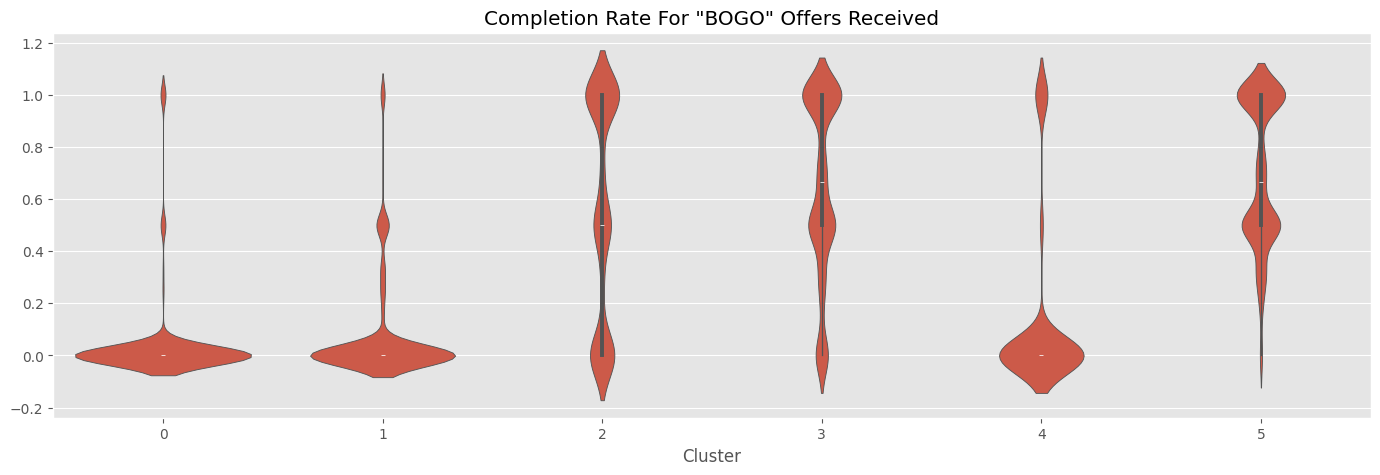

 cluster  mean  min  median  max
       0  0.04  0.0    0.00  1.0
       1  0.08  0.0    0.00  1.0
       2  0.56  0.0    0.50  1.0
       3  0.64  0.0    0.67  1.0
       4  0.14  0.0    0.00  1.0
       5  0.70  0.0    0.67  1.0


In [128]:
# Investigate viewership and completion rates as percentage of "bogo" offers received
for column, title in zip(['bogo_offer_viewed', 'bogo_offer_completed'], ['View', 'Completion']):
    u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns=['bogo_offer_received', column],
                        title=f'{title} Rate For "BOGO" Offers Received')

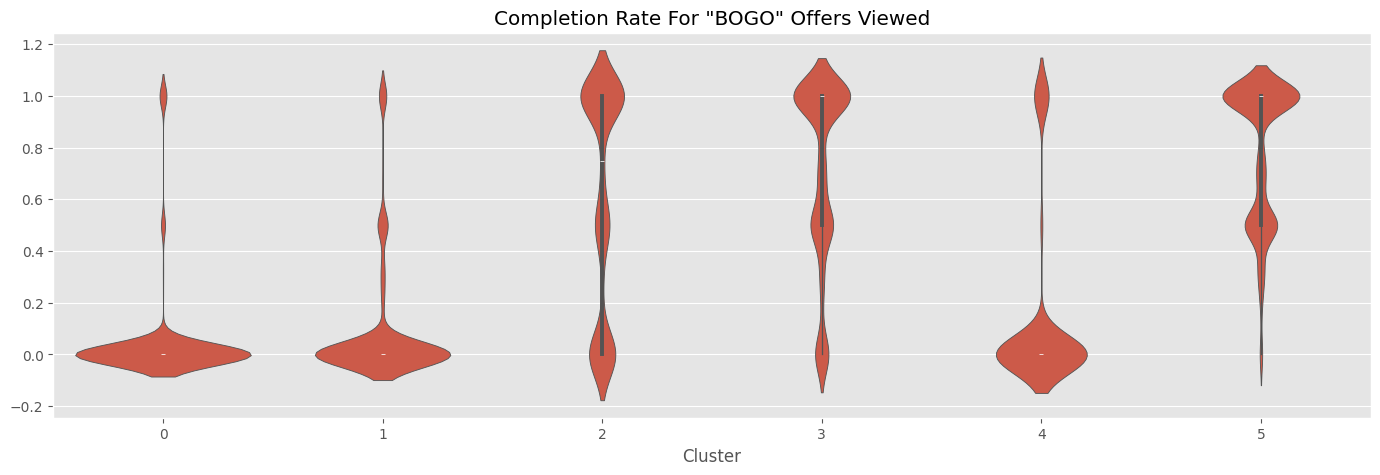

 cluster  mean  min  median  max
       0  0.05  0.0    0.00  1.0
       1  0.09  0.0    0.00  1.0
       2  0.60  0.0    0.75  1.0
       3  0.71  0.0    1.00  1.0
       4  0.14  0.0    0.00  1.0
       5  0.79  0.0    1.00  1.0


In [129]:
# Investigate completion rates as percentage of "bogo" offers viewed
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns=['bogo_offer_viewed', 'bogo_offer_completed'],
                        title='Completion Rate For "BOGO" Offers Viewed')

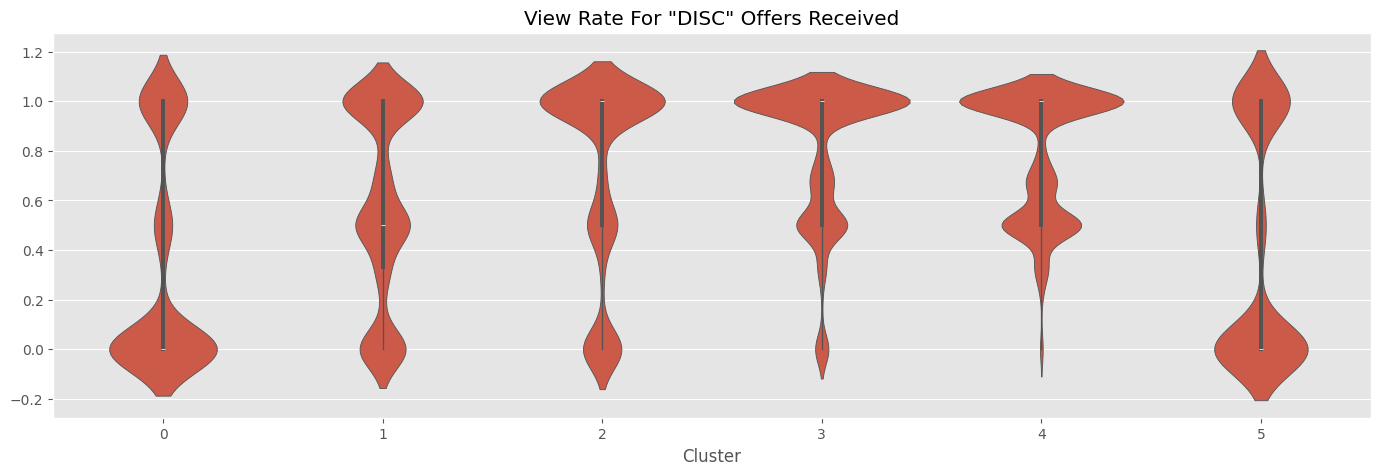

 cluster  mean  min  median  max
       0  0.33  0.0     0.0  1.0
       1  0.58  0.0     0.5  1.0
       2  0.72  0.0     1.0  1.0
       3  0.81  0.0     1.0  1.0
       4  0.78  0.0     1.0  1.0
       5  0.39  0.0     0.0  1.0


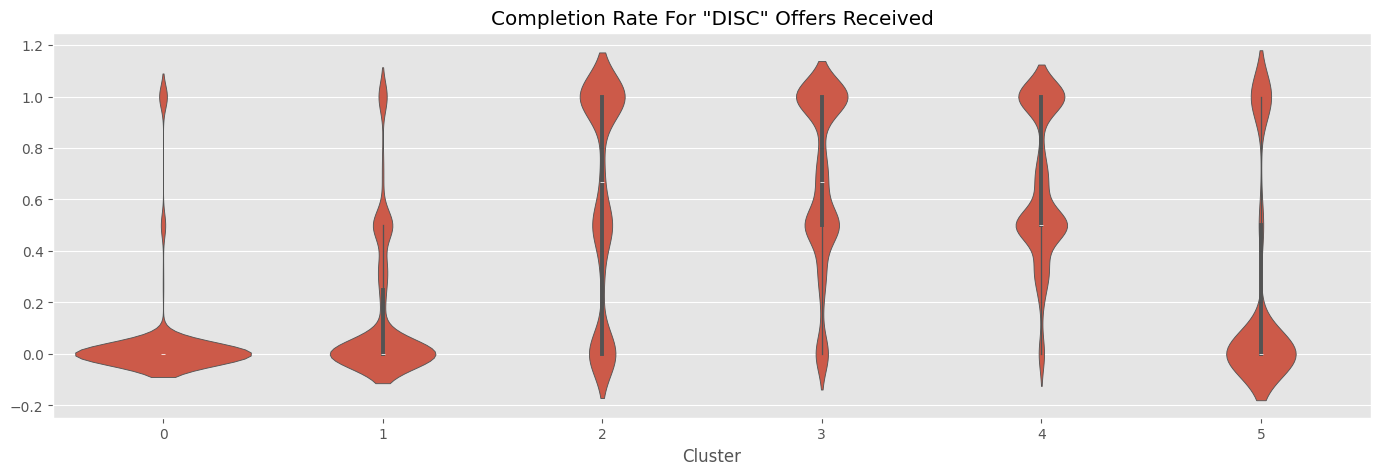

 cluster  mean  min  median  max
       0  0.05  0.0    0.00  1.0
       1  0.16  0.0    0.00  1.0
       2  0.60  0.0    0.67  1.0
       3  0.67  0.0    0.67  1.0
       4  0.65  0.0    0.50  1.0
       5  0.24  0.0    0.00  1.0


In [130]:
# Investigate viewership and completion rates as percentage of "disc" offers received
for column, title in zip(['disc_offer_viewed', 'disc_offer_completed'], ['View', 'Completion']):
    u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns=['disc_offer_received', column],
                        title=f'{title} Rate For "DISC" Offers Received')

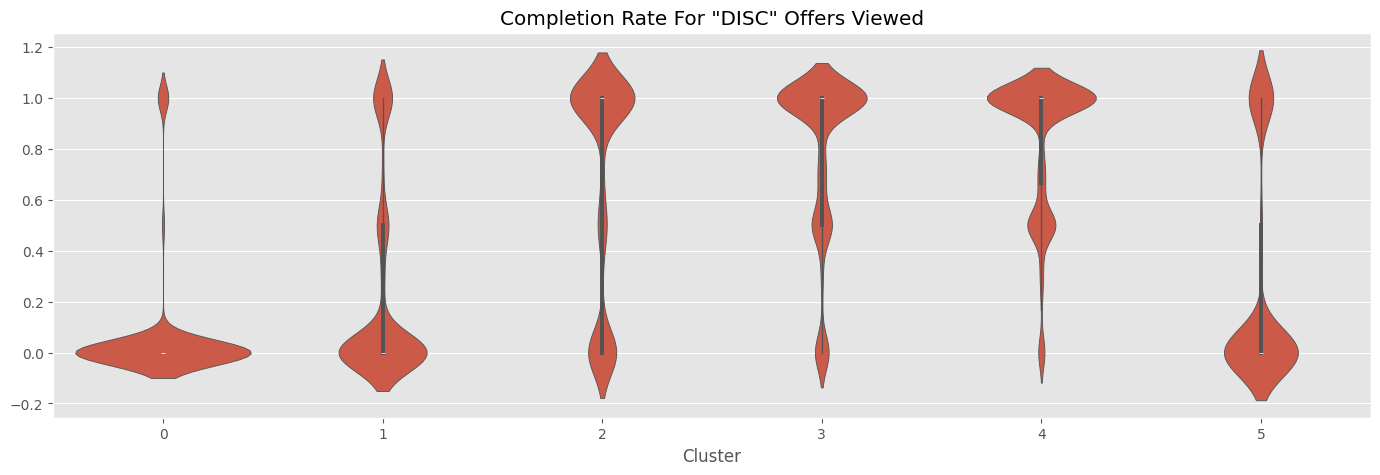

 cluster  mean  min  median  max
       0  0.06  0.0     0.0  1.0
       1  0.22  0.0     0.0  1.0
       2  0.68  0.0     1.0  1.0
       3  0.79  0.0     1.0  1.0
       4  0.83  0.0     1.0  1.0
       5  0.25  0.0     0.0  1.0


In [131]:
# Investigate completion rates as percentage of "disc" offers viewed
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns=['disc_offer_viewed', 'disc_offer_completed'],
                        title='Completion Rate For "DISC" Offers Viewed')

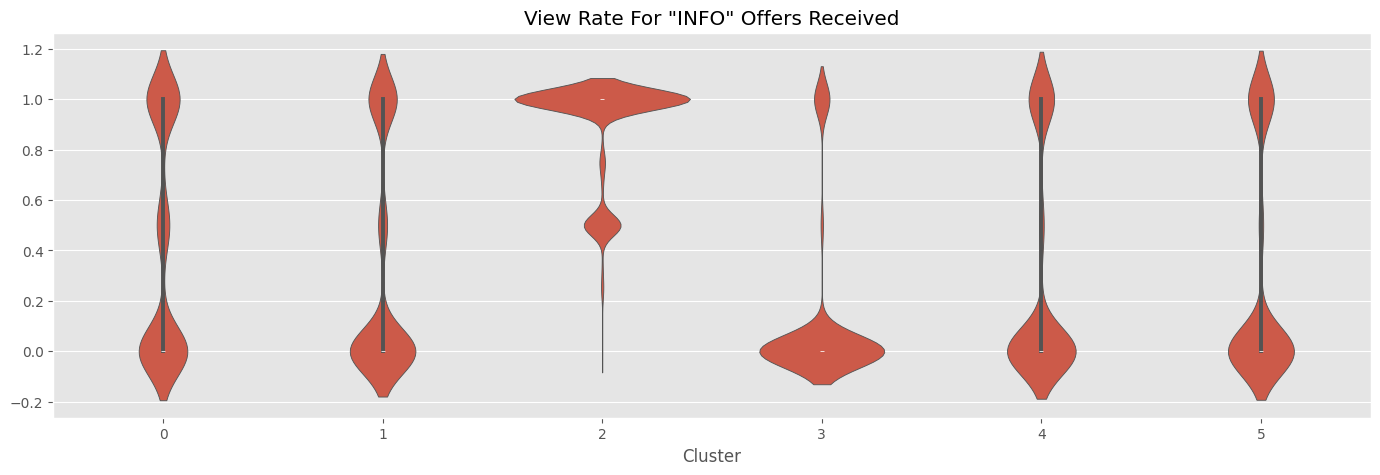

 cluster  mean  min  median  max
       0  0.42  0.0     0.0  1.0
       1  0.32  0.0     0.0  1.0
       2  0.90  0.0     1.0  1.0
       3  0.12  0.0     0.0  1.0
       4  0.28  0.0     0.0  1.0
       5  0.29  0.0     0.0  1.0


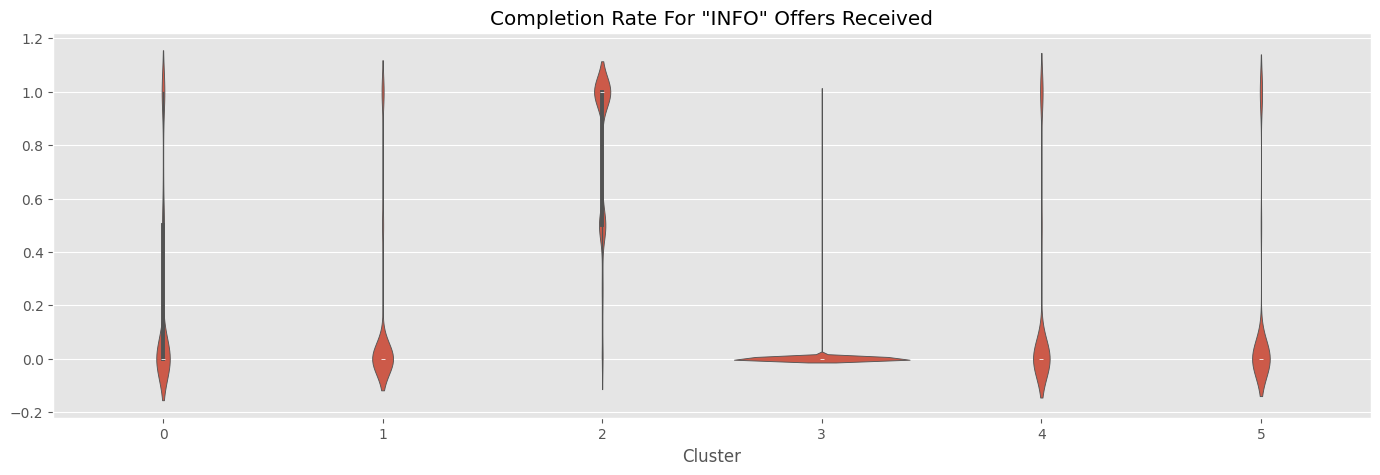

 cluster  mean  min  median  max
       0  0.21  0.0     0.0  1.0
       1  0.11  0.0     0.0  1.0
       2  0.81  0.0     1.0  1.0
       3  0.00  0.0     0.0  1.0
       4  0.14  0.0     0.0  1.0
       5  0.13  0.0     0.0  1.0


In [132]:
# Investigate viewership and completion rates as percentage of "info" offers received
for column, title in zip(['info_offer_viewed', 'info_offer_completed'], ['View', 'Completion']):
    u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns=['info_offer_received', column],
                        title=f'{title} Rate For "INFO" Offers Received')

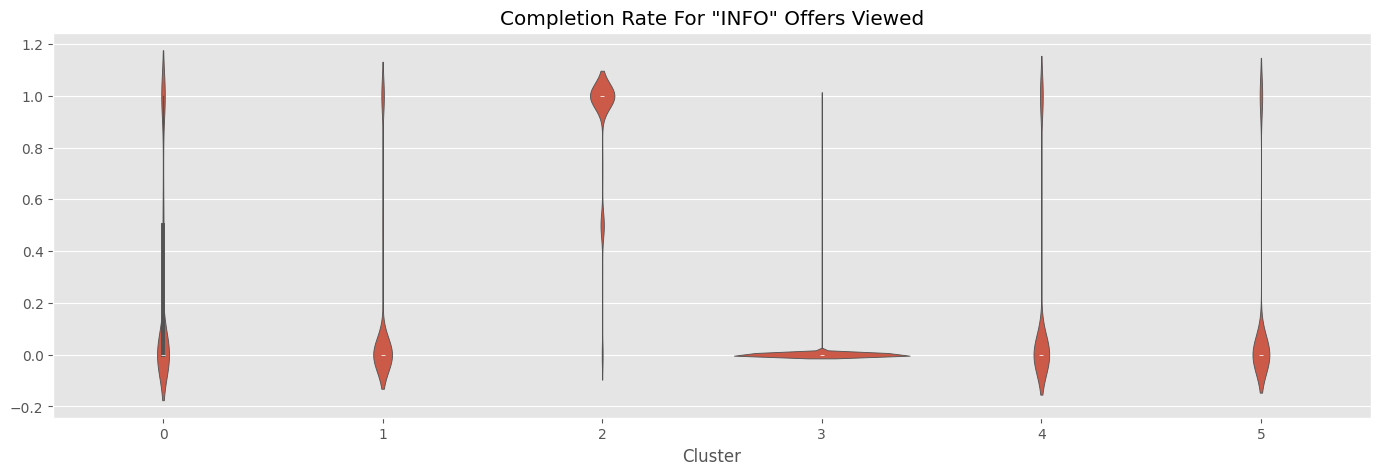

 cluster  mean  min  median  max
       0  0.24  0.0     0.0  1.0
       1  0.13  0.0     0.0  1.0
       2  0.90  0.0     1.0  1.0
       3  0.00  0.0     0.0  1.0
       4  0.16  0.0     0.0  1.0
       5  0.13  0.0     0.0  1.0


In [133]:
  # Investigate completion rates as percentage of "info" offers viewed
u.plot_cluster_analysis(plot='violinplot', df=coe,
                        target_columns=['info_offer_viewed', 'info_offer_completed'],
                        title='Completion Rate For "INFO" Offers Viewed')

In [134]:
# Create dataframe for important metrics to make recommendations
# according to the main two themes discussed in "problem statement"
reco = pd.DataFrame()

# Get relevant data; collected individually for convenient
# ordering, renaming, and computing of features on the go

reco['cluster'] = coe.cluster
reco['income'] = coe.income
reco['seniority'] = coe.days_member
reco['response'] = coe.response_score
reco['atv_nonpromo'] = coe.amt_nonpromo / coe.txn_nonpromo
reco['atv_promo'] = coe.amt_promo / coe.txn_promo
reco['rfm_nonpromo'] = coe.rfm_nonpromo_score
reco['rfm_promo'] = coe.rfm_promo_score
reco['view_bogo'] = coe.bogo_offer_viewed / coe.bogo_offer_received
reco['view_disc'] = coe.disc_offer_viewed / coe.disc_offer_received
reco['view_info'] = coe.info_offer_viewed / coe.info_offer_received
reco['complete_bogo'] = coe.bogo_offer_completed / coe.bogo_offer_viewed
reco['complete_disc'] = coe.disc_offer_completed / coe.disc_offer_viewed
reco['complete_info'] = coe.info_offer_completed / coe.info_offer_viewed

# Groupby `cluster` and aggregate by mean
reco = reco.groupby('cluster').mean()

# Normalize data feature-wise; this allows to plot
# a heatmap representing marks among formed clusters
reco = pd.DataFrame(MinMaxScaler().fit_transform(reco),
                   columns=reco.columns, index=reco.index)

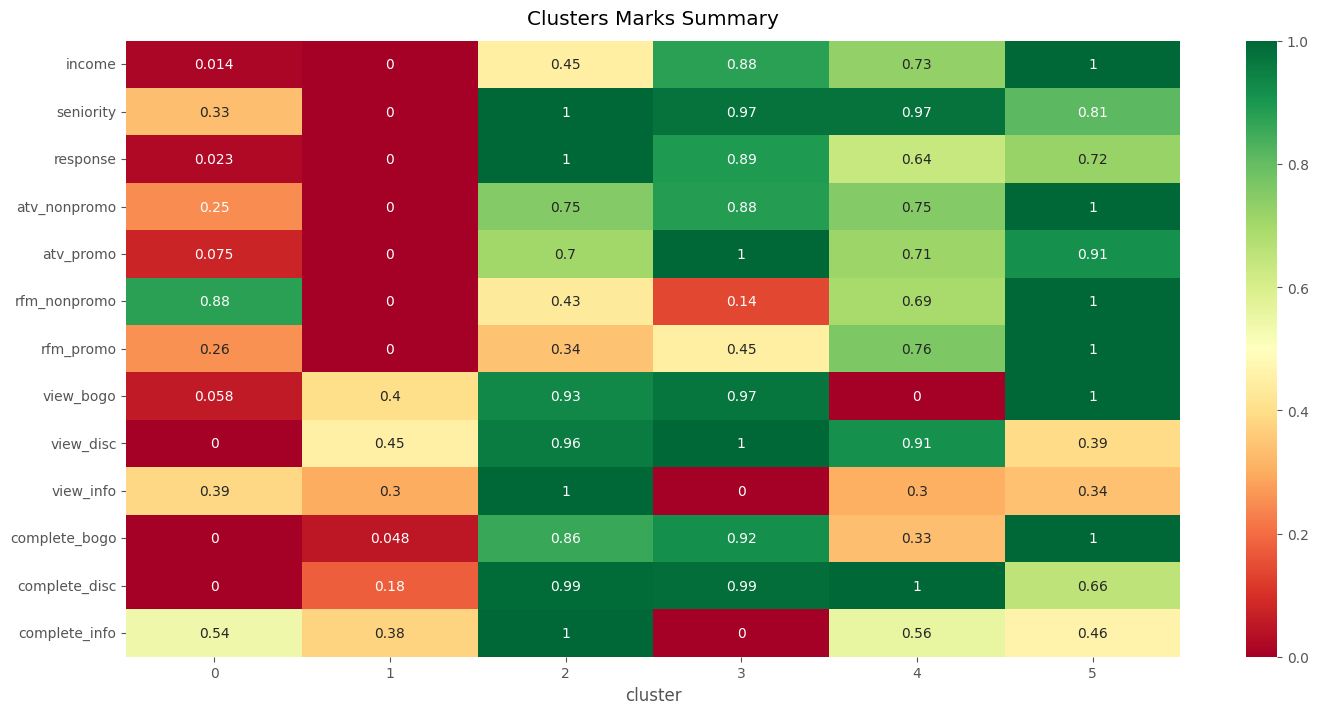

In [135]:
# Plot heatmap
fig = plt.figure(figsize=(17,8))
fig = sns.heatmap(reco.T, annot=True, cmap='RdYlGn')
fig.set_title('Clusters Marks Summary', pad=12)
# Fix issue in matplotlib 3.1.1 where plot is truncated
# https://github.com/matplotlib/matplotlib/issues/14675
fig.set_ylim(len(reco.T), 0)
plt.show()

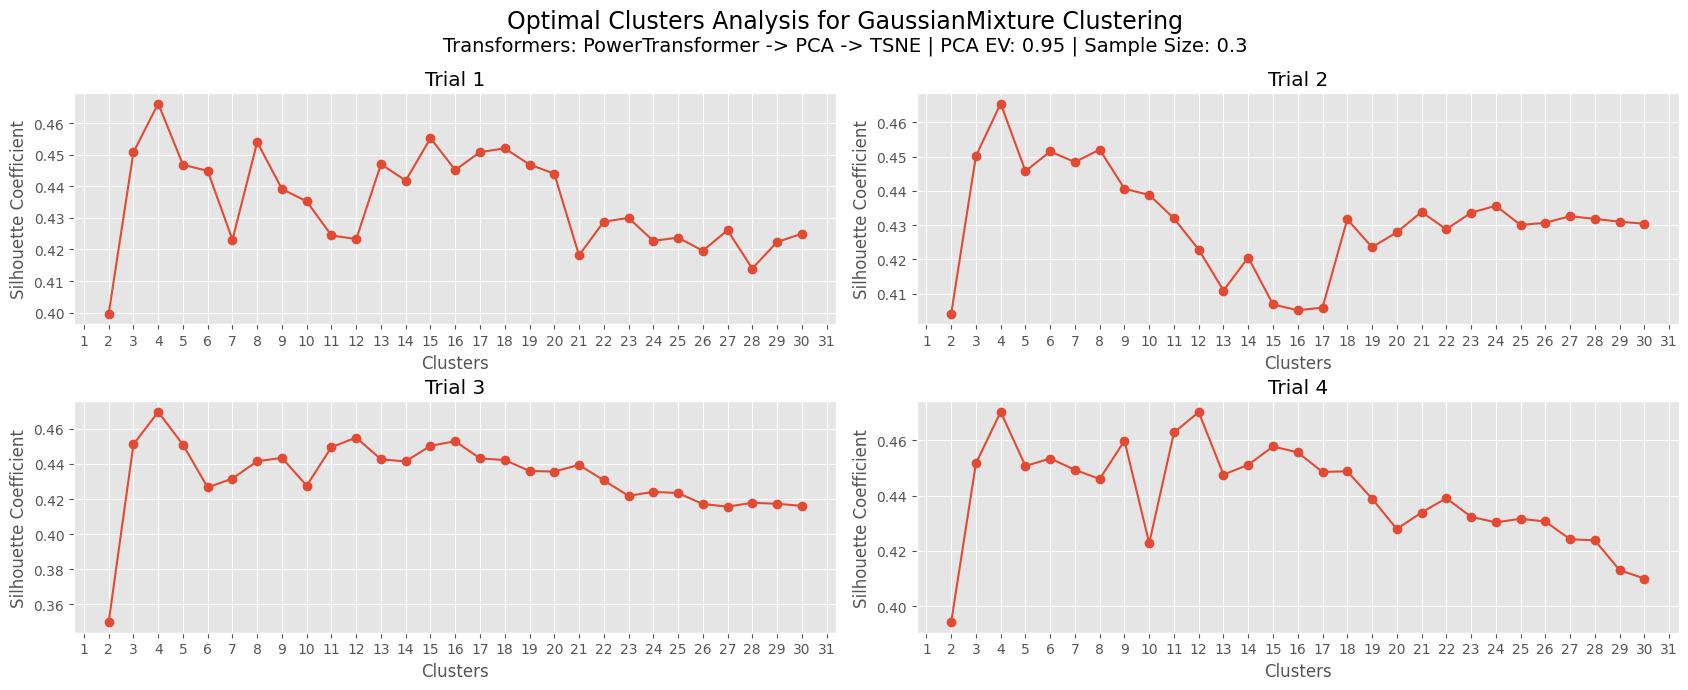

In [136]:
# Investigate change in silhouette across number of clusters
u.plot_optimization_analysis(
    df = coe,
    est = 'GaussianMixture',
    ev = 0.95,
    tsne = True,
    sample_size = 0.3)

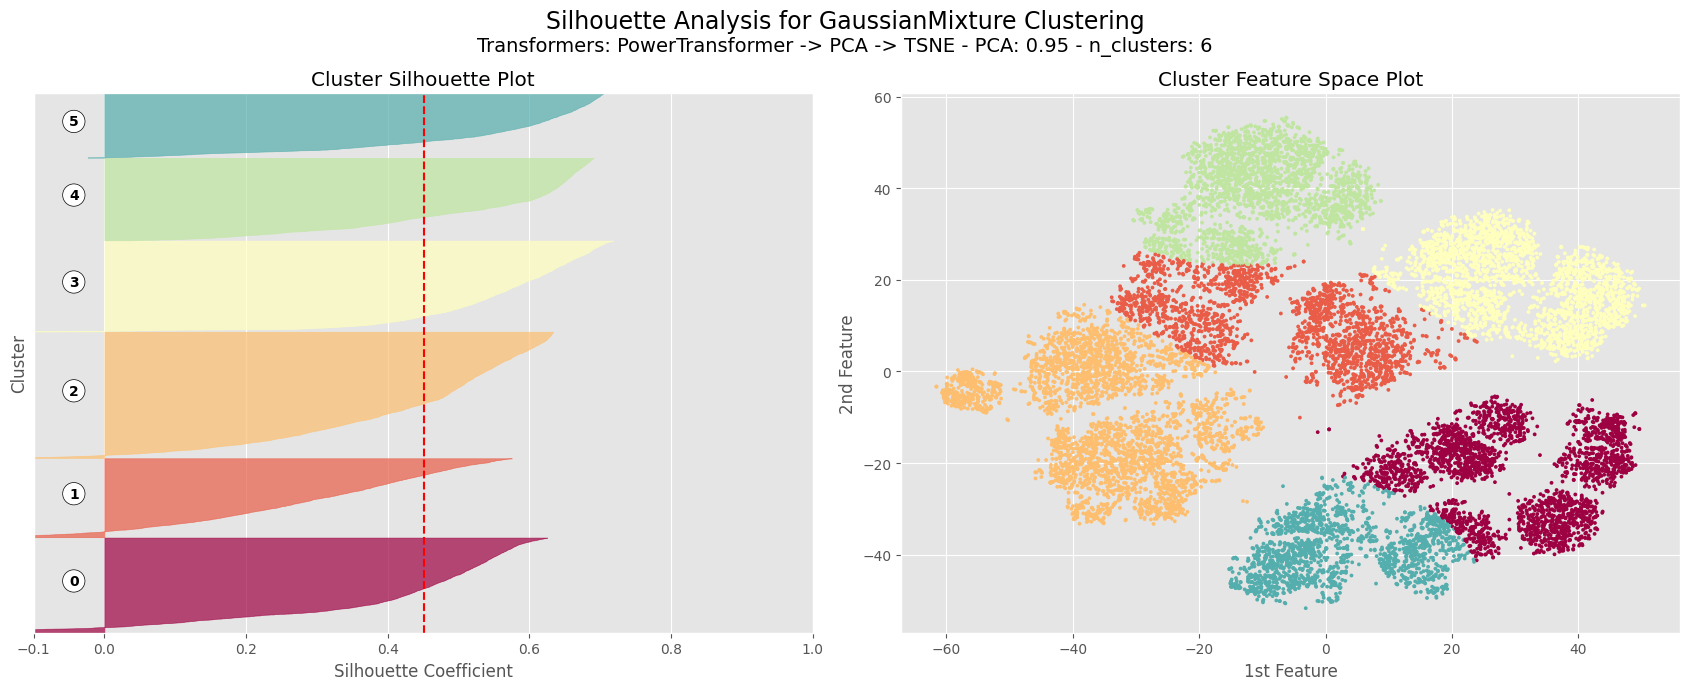

In [137]:
# Investigate silhouette analysis plot with n_clusters=6
u.plot_silhouette_analysis(
    df = coe,
    est = 'GaussianMixture',
    ev = 0.95,
    tsne = True,
    n_clusters = 6)

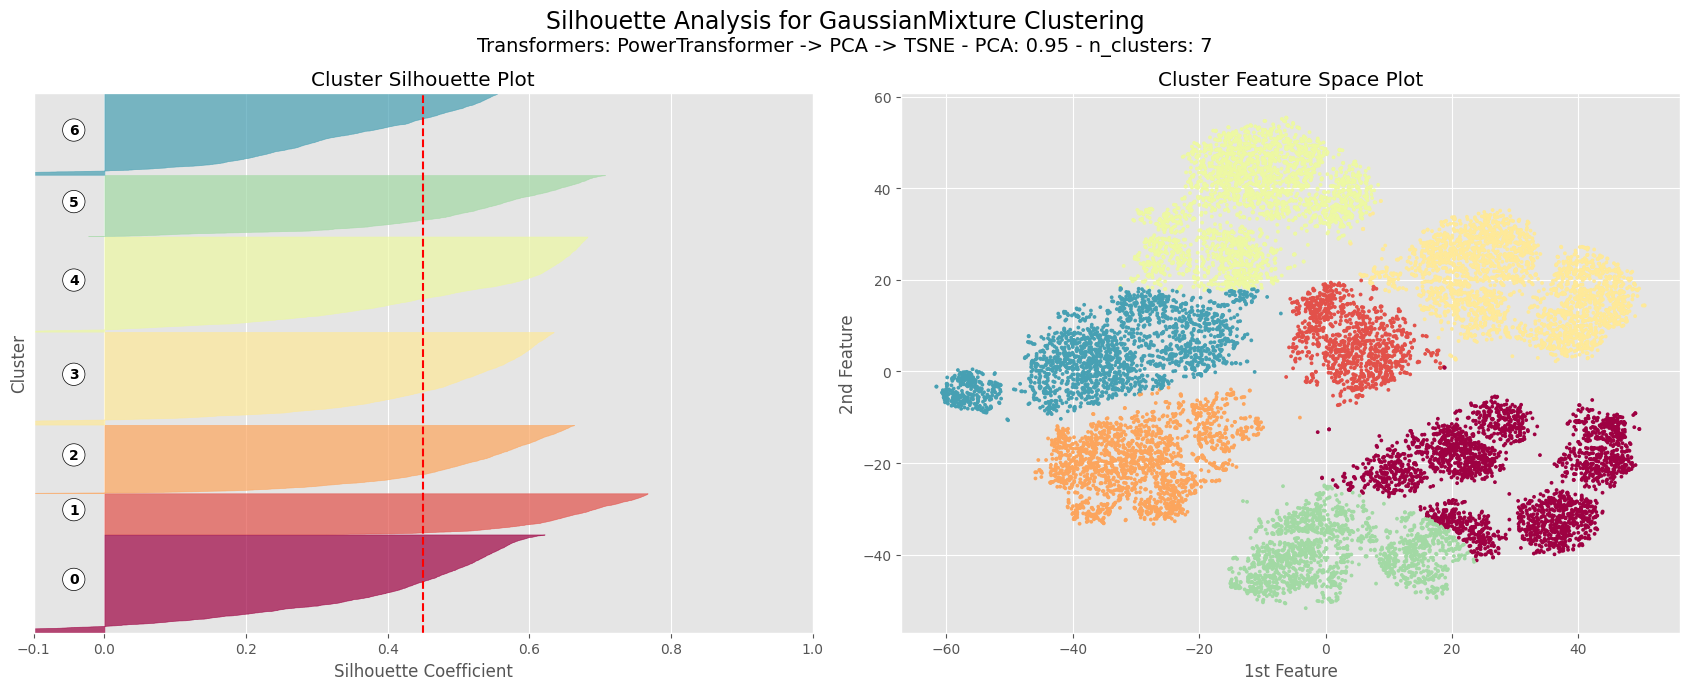

In [138]:
# Investigate silhouette analysis plot with n_clusters=6
u.plot_silhouette_analysis(
    df = coe,
    est = 'GaussianMixture',
    ev = 0.95,
    tsne = True,
    n_clusters = 7)